# CW1

package:

In [1]:
#load the packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import  LabelEncoder


In [2]:
path = "MavenRail.csv"

In [3]:
dataset1 = pd.read_csv(path)

show the head of the dataset

In [4]:
dataset1.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No


### Data Preprocessing

check missing data:

In [5]:
dataset1.isna().sum()

Payment.Method           0
Railcard             20911
Ticket.Class             0
Ticket.Type              0
Price                    0
Departure.Station        0
Arrival.Station          0
Departure                3
Scheduled.Arrival        4
Actual.Arrival        1880
Journey.Status           0
Reason.for.Delay     27479
Refund.Request           0
dtype: int64

- Railcard This parameter can be NaN, which is a category that does not use Railcard.
- Actual.Arrival A very large number of missing values appear Check whether it is because the cancel case exists at the same time, the case does not exist Actual.Arrival is correct
- Reason.for.Delay attribute There should be both values and no values, as there are both late and no-late scenarios
- Departure You need to check the missing value, if there is an error, you can delete it directly, if the data volume is large enough, the deletion will not have a big impact.
- Scheduled.Arrival 和 Departure treat alike

In [6]:
dataset1[dataset1['Departure'].isna() == True]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
23613,Credit Card,NaN,First Class,Advance,10,Liverpool Lime Street,Manchester Piccadilly,NaN,NaN,NaN,On Time,NaN,No
23614,Contactless,Disabled,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,NaN,2024-03-31 02:00,2024-03-31 02:00,On Time,NaN,No
23618,Contactless,NaN,Standard,Off-Peak,11,York,Durham,NaN,2024-03-31 02:35,2024-03-31 02:35,On Time,NaN,No


You can see that there are errors in these three rows of data. Select Delete this data.

In [7]:
indexes_to_drop = dataset1[dataset1['Departure'].isna()].index

In [8]:
dataset1 = dataset1.drop(indexes_to_drop)

In [9]:
dataset1[dataset1['Scheduled.Arrival'].isna() == True]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
23609,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-03-31 00:00,NaN,2024-03-31 02:46,Delayed,Signal Failure,No
23616,Contactless,Adult,Standard,Off-Peak,24,York,Edinburgh,2024-03-31 22:30,NaN,NaN,On Time,NaN,No
23624,Credit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-03-31 23:30,NaN,NaN,On Time,NaN,No


You can see that these three data belong to the error data, choose to delete these three data

In [10]:
indexes_to_drop1 = dataset1[dataset1['Scheduled.Arrival'].isna()].index

In [11]:
dataset1 = dataset1.drop(indexes_to_drop1)

In [12]:
dataset1[(dataset1['Journey.Status'] != 'Cancelled') & (dataset1['Actual.Arrival'].isna())]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request


Arrival column does not have missing value for non-Cancel cases

Secondary inspection

In [13]:
dataset1[(dataset1['Journey.Status'] == 'Cancelled')]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
39,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15,2024-01-02 03:35,NaN,Cancelled,Technical Issue,No
75,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02 16:00,2024-01-02 17:20,NaN,Cancelled,Technical Issue,No
91,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02 02:15,2024-01-02 03:35,NaN,Cancelled,Technical Issue,Yes
111,Credit Card,NaN,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-02 05:00,2024-01-02 06:20,NaN,Cancelled,Staffing,Yes
148,Credit Card,NaN,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02 08:00,2024-01-02 10:15,NaN,Cancelled,Staff,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30 18:45,2024-04-30 20:35,NaN,Cancelled,Signal Failure,No
31633,Credit Card,Adult,Standard,Anytime,95,London Euston,Manchester Piccadilly,2024-04-30 18:45,2024-04-30 20:35,NaN,Cancelled,Signal Failure,Yes
31634,Contactless,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 18:45,2024-04-30 19:15,NaN,Cancelled,Weather,No
31636,Credit Card,NaN,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-04-30 18:45,2024-04-30 20:05,NaN,Cancelled,Signal Failure,No


In [14]:
dataset1['Scheduled.Arrival'] = dataset1['Scheduled.Arrival'].fillna(pd.NaT)

In [15]:
dataset1['Actual.Arrival'] = dataset1['Actual.Arrival'].fillna(pd.NaT)

In [16]:
dataset1[dataset1['Actual.Arrival'].isna()]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
39,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15,2024-01-02 03:35,NaN,Cancelled,Technical Issue,No
75,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02 16:00,2024-01-02 17:20,NaN,Cancelled,Technical Issue,No
91,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02 02:15,2024-01-02 03:35,NaN,Cancelled,Technical Issue,Yes
111,Credit Card,NaN,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-02 05:00,2024-01-02 06:20,NaN,Cancelled,Staffing,Yes
148,Credit Card,NaN,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02 08:00,2024-01-02 10:15,NaN,Cancelled,Staff,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30 18:45,2024-04-30 20:35,NaN,Cancelled,Signal Failure,No
31633,Credit Card,Adult,Standard,Anytime,95,London Euston,Manchester Piccadilly,2024-04-30 18:45,2024-04-30 20:35,NaN,Cancelled,Signal Failure,Yes
31634,Contactless,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 18:45,2024-04-30 19:15,NaN,Cancelled,Weather,No
31636,Credit Card,NaN,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-04-30 18:45,2024-04-30 20:05,NaN,Cancelled,Signal Failure,No


In [17]:
#Reset Index
dataset1.reset_index(drop=True, inplace=True)

In [18]:
dataset1

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30,2024-04-30 20:30,On Time,NaN,No
31635,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35,2024-04-30 21:35,On Time,NaN,No
31636,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45,2024-04-30 20:45,On Time,NaN,No
31637,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35,2024-04-30 22:35,On Time,NaN,No


<Figure size 1000x600 with 0 Axes>

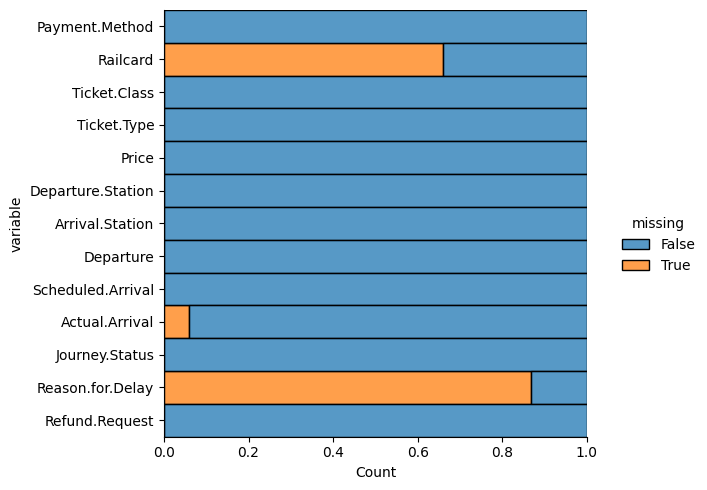

In [19]:
plt.figure(figsize=(10,6))
sns.displot(
    data=dataset1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

check dulicate data 

In [20]:
dataset1[dataset1.duplicated()]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
16,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 07:45,2024-01-01 08:45,2024-01-01 08:45,On Time,NaN,No
89,Contactless,NaN,Standard,Off-Peak,11,York,Durham,2024-01-02 01:45,2024-01-02 02:35,2024-01-02 02:35,On Time,NaN,No
97,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-01-03 23:45,2024-01-03 00:35,2024-01-03 00:35,On Time,NaN,No
122,Debit Card,Senior,Standard,Anytime,17,London Paddington,Reading,2024-01-02 06:15,2024-01-02 07:15,2024-01-02 07:15,On Time,NaN,No
125,Credit Card,Senior,Standard,Anytime,3,Manchester Piccadilly,Liverpool Lime Street,2024-01-02 06:15,2024-01-02 06:45,2024-01-02 06:45,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31614,Credit Card,NaN,Standard,Anytime,70,London Kings Cross,York,2024-04-30 17:00,2024-04-30 18:50,2024-04-30 18:50,On Time,NaN,No
31617,Credit Card,Adult,Standard,Anytime,9,London Euston,Birmingham New Street,2024-04-30 17:45,2024-04-30 19:05,2024-04-30 19:05,On Time,NaN,No
31618,Credit Card,Adult,Standard,Anytime,9,London Euston,Birmingham New Street,2024-04-30 17:45,2024-04-30 19:05,2024-04-30 19:05,On Time,NaN,No
31619,Credit Card,Adult,Standard,Anytime,9,London Euston,Birmingham New Street,2024-04-30 17:45,2024-04-30 19:05,2024-04-30 19:05,On Time,NaN,No


Since there is no customer name, or order number present, and there can be multiple passengers on the same trip, it is not considered that the data duplicated here is part of what needs to be processed

check the price = 0 situation

In [21]:
dataset1[dataset1['Price']==0]

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request


check the data type:

In [22]:
dataset1.dtypes

Payment.Method       object
Railcard             object
Ticket.Class         object
Ticket.Type          object
Price                 int64
Departure.Station    object
Arrival.Station      object
Departure            object
Scheduled.Arrival    object
Actual.Arrival       object
Journey.Status       object
Reason.for.Delay     object
Refund.Request       object
dtype: object

In [23]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31639 entries, 0 to 31638
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31639 non-null  object
 1   Railcard           10732 non-null  object
 2   Ticket.Class       31639 non-null  object
 3   Ticket.Type        31639 non-null  object
 4   Price              31639 non-null  int64 
 5   Departure.Station  31639 non-null  object
 6   Arrival.Station    31639 non-null  object
 7   Departure          31639 non-null  object
 8   Scheduled.Arrival  31639 non-null  object
 9   Actual.Arrival     29762 non-null  object
 10  Journey.Status     31639 non-null  object
 11  Reason.for.Delay   4165 non-null   object
 12  Refund.Request     31639 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB


need to convert the data

Convert time data types

In [24]:
dataset1["Departure"] = dataset1["Departure"].apply(lambda x: pd.to_datetime(x, format='ISO8601') if pd.notna(x) else x)
dataset1["Scheduled.Arrival"] = dataset1["Scheduled.Arrival"].apply(lambda x: pd.to_datetime(x, format='ISO8601') if pd.notna(x) else x)
dataset1["Actual.Arrival"] = dataset1["Actual.Arrival"].apply(lambda x: pd.to_datetime(x, format='ISO8601') if pd.notna(x) else x)

In [25]:
dataset1["Actual.Arrival"]

0       2024-01-01 13:30:00
1       2024-01-01 11:40:00
2       2024-01-02 18:45:00
3       2024-01-01 22:30:00
4       2024-01-01 19:00:00
                ...        
31634   2024-04-30 20:30:00
31635   2024-04-30 21:35:00
31636   2024-04-30 20:45:00
31637   2024-04-30 22:35:00
31638   2024-04-30 22:00:00
Name: Actual.Arrival, Length: 31639, dtype: datetime64[ns]

In [26]:
dataset1.dtypes

Payment.Method               object
Railcard                     object
Ticket.Class                 object
Ticket.Type                  object
Price                         int64
Departure.Station            object
Arrival.Station              object
Departure            datetime64[ns]
Scheduled.Arrival    datetime64[ns]
Actual.Arrival       datetime64[ns]
Journey.Status               object
Reason.for.Delay             object
Refund.Request               object
dtype: object

### EDA

Separation into numeric and typed data

In [ ]:
# Separation of numeric data and subtyped data
numeric_data = dataset1.select_dtypes(include=['number'])
categorical_data = dataset1.select_dtypes(include=['object','timedelta64[ns]'])
time_date = dataset1.select_dtypes(include=['datetime64'])
# Statistical description using describe for numerical data

In [28]:
numeric_data.describe()

,Price
count,31639.000000
mean,23.432820
std,29.988502
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [29]:
time_date.describe()

,Departure,Scheduled.Arrival,Actual.Arrival
count,31639,31639,29762
mean,2024-03-01 20:02:09.514207232,2024-03-01 20:29:39.765479424,2024-03-01 19:19:42.541495808
min,2024-01-01 00:00:00,2024-01-01 00:30:00,2024-01-01 00:30:00
25%,2024-01-31 08:00:00,2024-01-31 09:15:00,2024-01-31 09:15:00
50%,2024-03-01 22:15:00,2024-03-01 22:05:00,2024-03-01 13:05:00
75%,2024-03-31 13:22:30,2024-03-31 13:45:00,2024-03-31 10:45:30
max,2024-04-30 23:45:00,2024-04-30 23:50:00,2024-04-30 23:50:00


In [30]:
dataset1[['Payment.Method', 'Railcard', 'Ticket.Class', 'Ticket.Type', 'Departure.Station','Arrival.Station', 'Journey.Status', 'Reason.for.Delay', 'Refund.Request']].describe()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Departure.Station,Arrival.Station,Journey.Status,Reason.for.Delay,Refund.Request
count,31639,10732,31639,31639,31639,31639,31639,4165,31639
unique,3,3,2,3,12,32,3,6,2
top,Credit Card,Adult,Standard,Advance,Manchester Piccadilly,Birmingham New Street,On Time,Weather,No
freq,19130,4844,28583,17555,5647,7740,27474,1372,30525


#### visualisation

Price distribution:

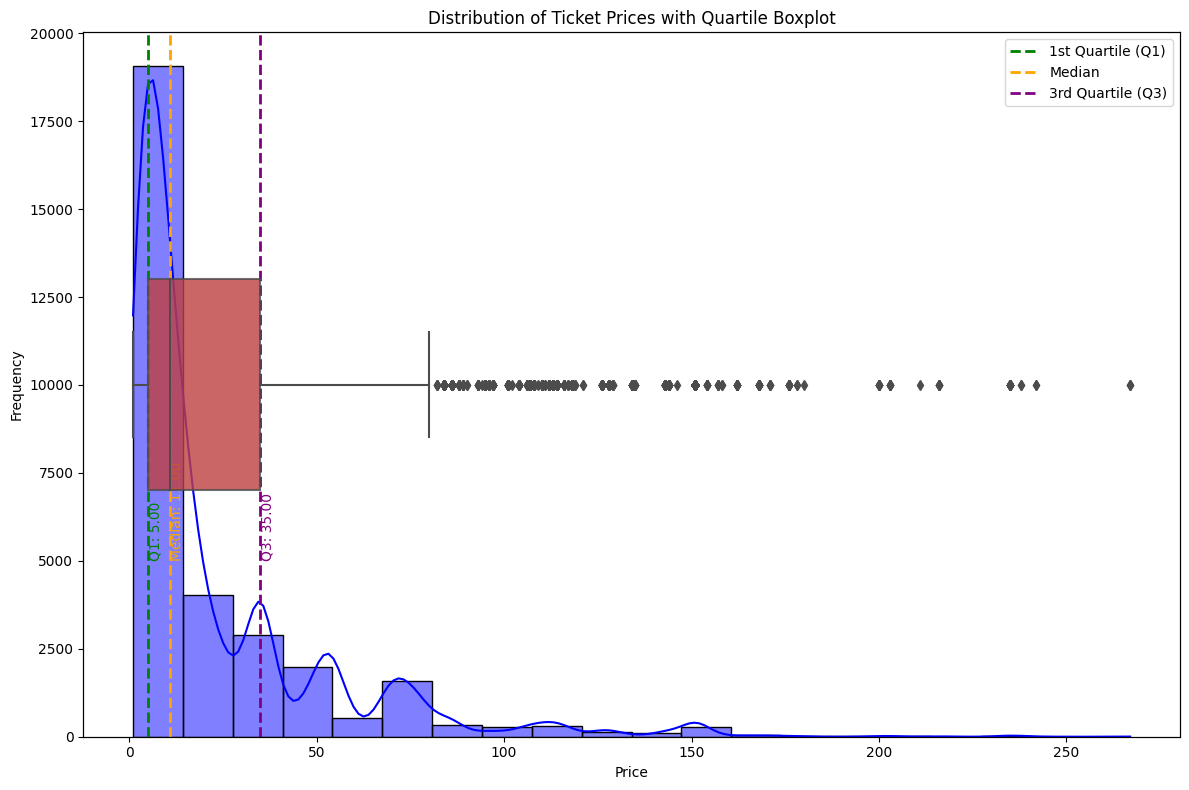

In [ ]:


# Create a master-slave shared horizontal axis with histograms and box plots
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate quartiles
q1 = np.percentile(dataset1['Price'], 25)
median = np.median(dataset1['Price'])
q3 = np.percentile(dataset1['Price'], 75)

# Plotting histograms
sns.histplot(dataset1['Price'], bins=20, kde=True, color='blue', ax=ax)
ax.set_title('Distribution of Ticket Prices with Quartile Boxplot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add a box plot on the same axis and modify its transparency
ax_box = ax.twinx()  # Different y-axis sharing the x-axis
box_plot = sns.boxplot(x=dataset1['Price'], width=0.3, color='red', ax=ax_box, saturation=0.5)  # Use the saturation parameter to adjust the colour saturation.

# Adjusting the transparency of the box plot
for patch in box_plot.patches:
    patch.set_alpha(0.8)  # Setting transparency

ax_box.set_ylabel('')  # Remove the y-axis labels to avoid confusion
ax_box.set_yticks([])  # Remove y-axis scale

# Add a dotted line to the diagram
ax.axvline(x=q1, color='green', linestyle='--', linewidth=2, label='1st Quartile (Q1)')
ax.axvline(x=median, color='orange', linestyle='--', linewidth=2, label='Median')
ax.axvline(x=q3, color='purple', linestyle='--', linewidth=2, label='3rd Quartile (Q3)')

ax.text(q1, 5000, f'Q1: {q1:.2f}', color='green', rotation=90, verticalalignment='bottom')
ax.text(median, 5000, f'Median: {median:.2f}', color='orange', rotation=90, verticalalignment='bottom')
ax.text(q3, 5000, f'Q3: {q3:.2f}', color='purple', rotation=90, verticalalignment='bottom')


# Show legend
ax.legend()

# Restructuring of the layout
plt.tight_layout()
plt.show()



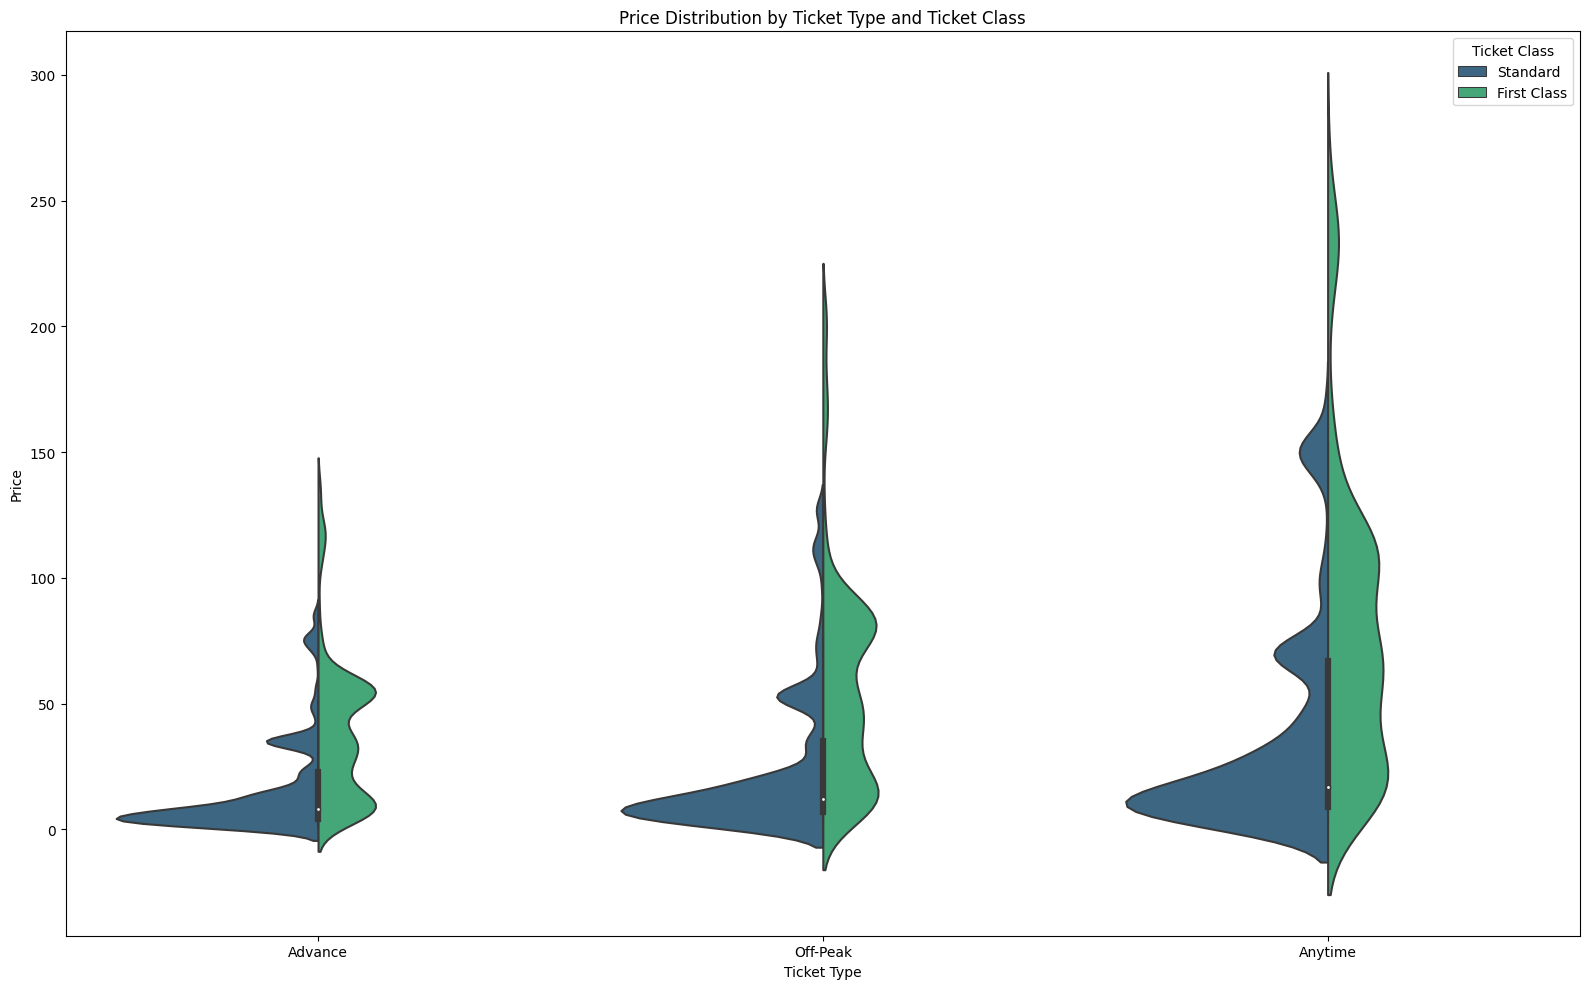

In [ ]:
# Create a violin diagram to show the relationship between fares, ticket types and cabin categories
plt.figure(figsize=(16, 10))

sns.violinplot(x='Ticket.Type', y='Price', hue='Ticket.Class', data=dataset1, split=True, palette='viridis')
plt.title('Price Distribution by Ticket Type and Ticket Class')
plt.xlabel('Ticket Type')
plt.ylabel('Price')
plt.legend(title='Ticket Class')
plt.tight_layout()
plt.show()


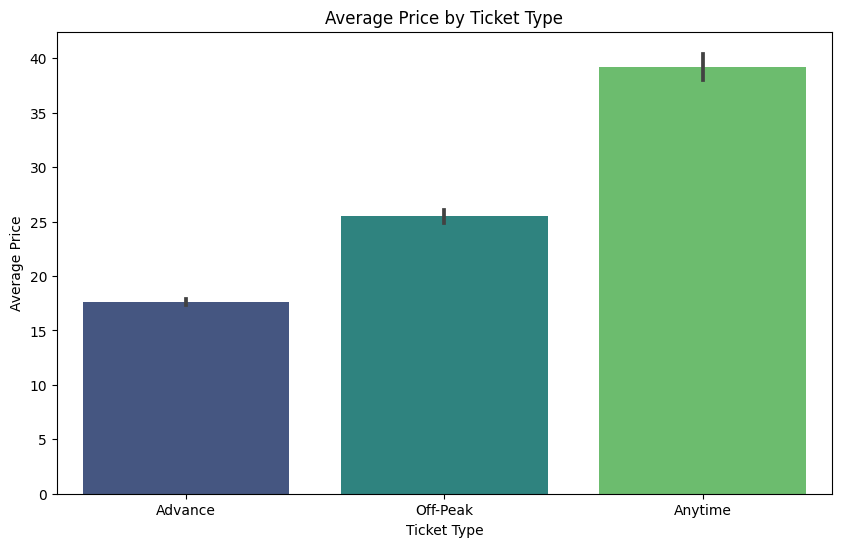

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ticket.Type', y='Price', data=dataset1, palette='viridis')
plt.title('Average Price by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Average Price')
plt.show()

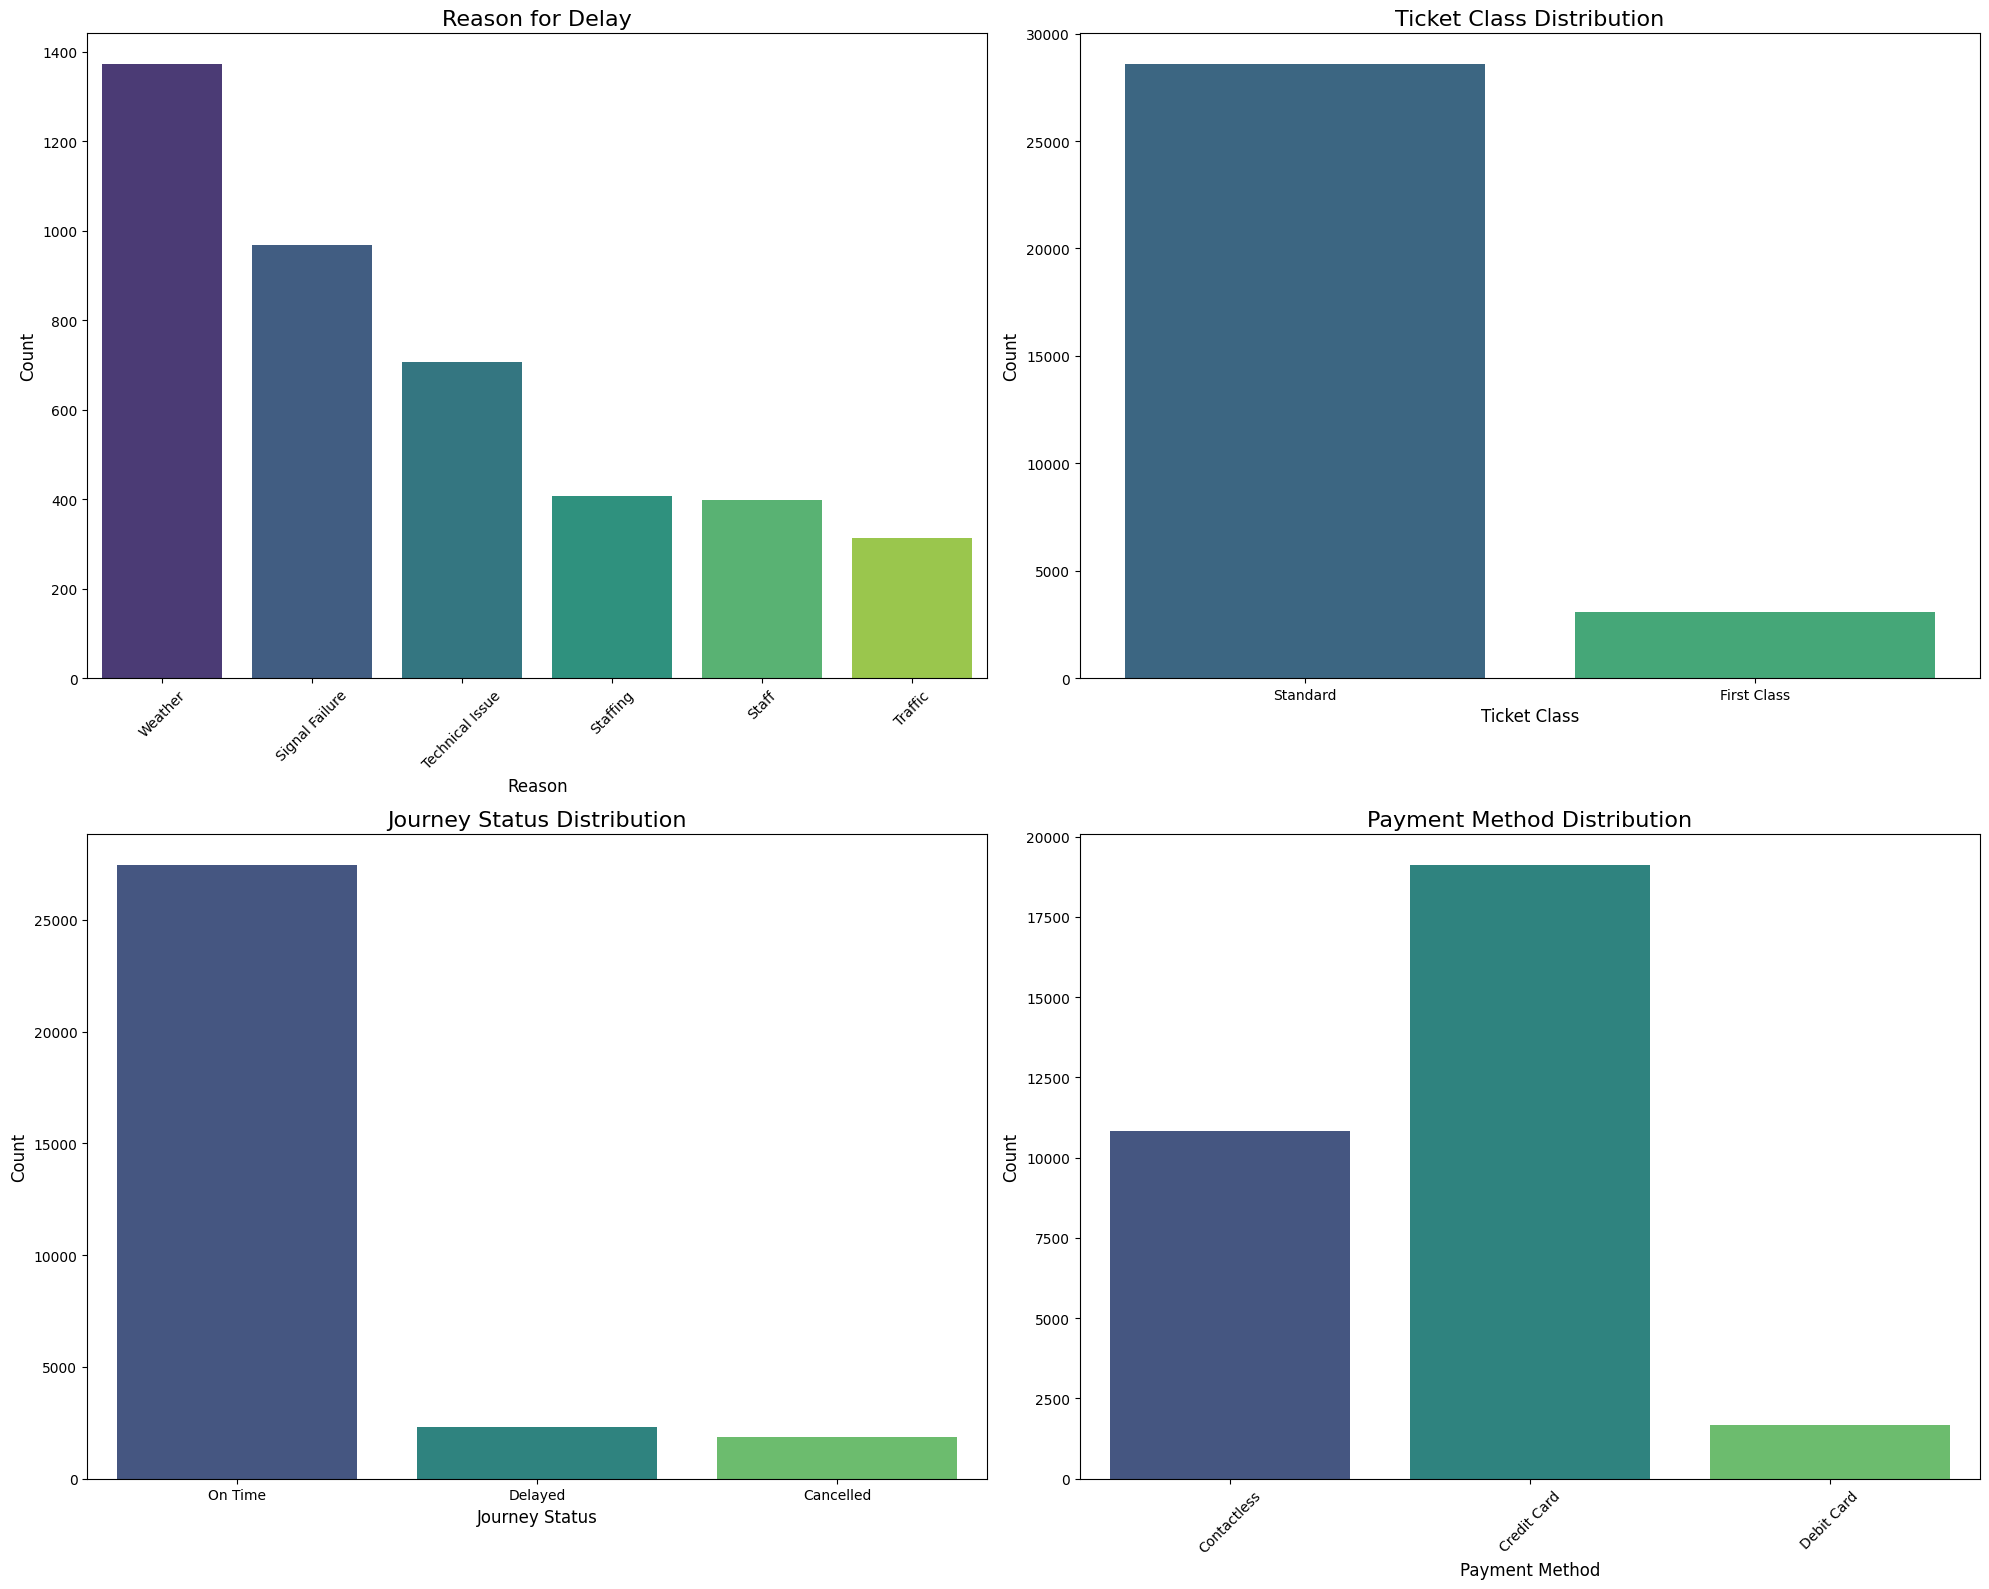

In [34]:
delay_reasons = dataset1['Reason.for.Delay'].value_counts()
# Creating subplots to combine the first four visualizations into a single figure
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Reason for Delay Analysis
sns.barplot(x=delay_reasons.index, y=delay_reasons.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Reason for Delay', fontsize=16)
axes[0, 0].set_xlabel('Reason', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Ticket Class Distribution
sns.countplot(x='Ticket.Class', data=dataset1, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Ticket Class Distribution', fontsize=16)
axes[0, 1].set_xlabel('Ticket Class', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Plot 3: Journey Status Distribution
sns.countplot(x='Journey.Status', data=dataset1, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Journey Status Distribution', fontsize=16)
axes[1, 0].set_xlabel('Journey Status', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# Plot 4: Payment Method Distribution
sns.countplot(x='Payment.Method', data=dataset1, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Payment Method Distribution', fontsize=16)
axes[1, 1].set_xlabel('Payment Method', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()


延迟原因统计

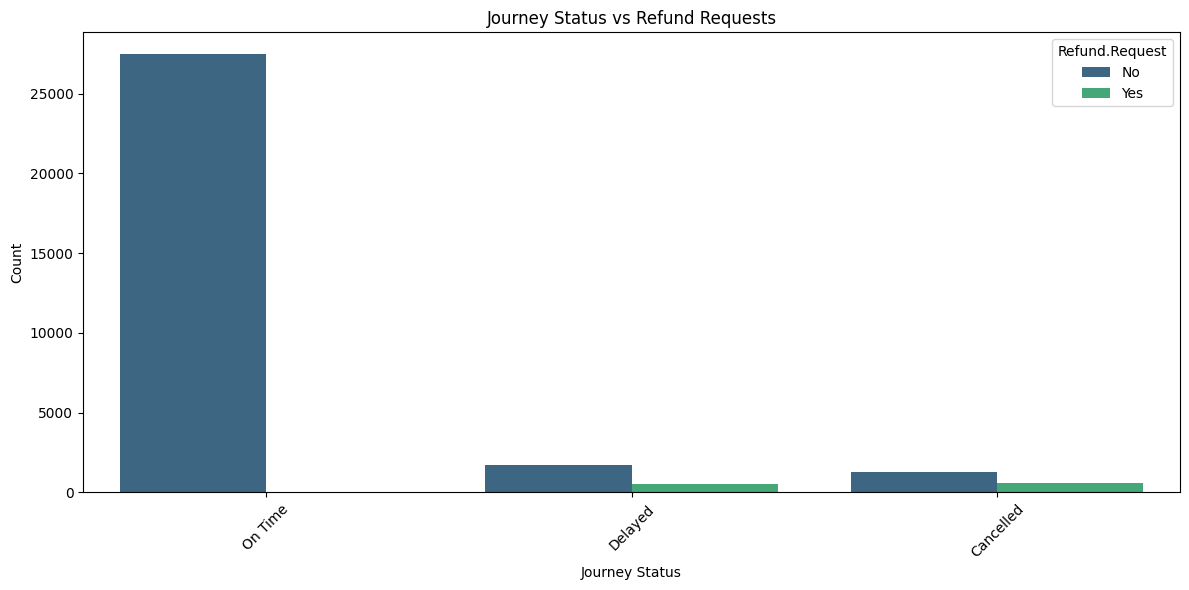

In [35]:
# Plotting the relationship between journey status and refund requests
plt.figure(figsize=(12, 6))
sns.countplot(x='Journey.Status', hue='Refund.Request', data=dataset1, palette='viridis')
plt.title('Journey Status vs Refund Requests')
plt.xlabel('Journey Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Outbound and Inbound Distribution

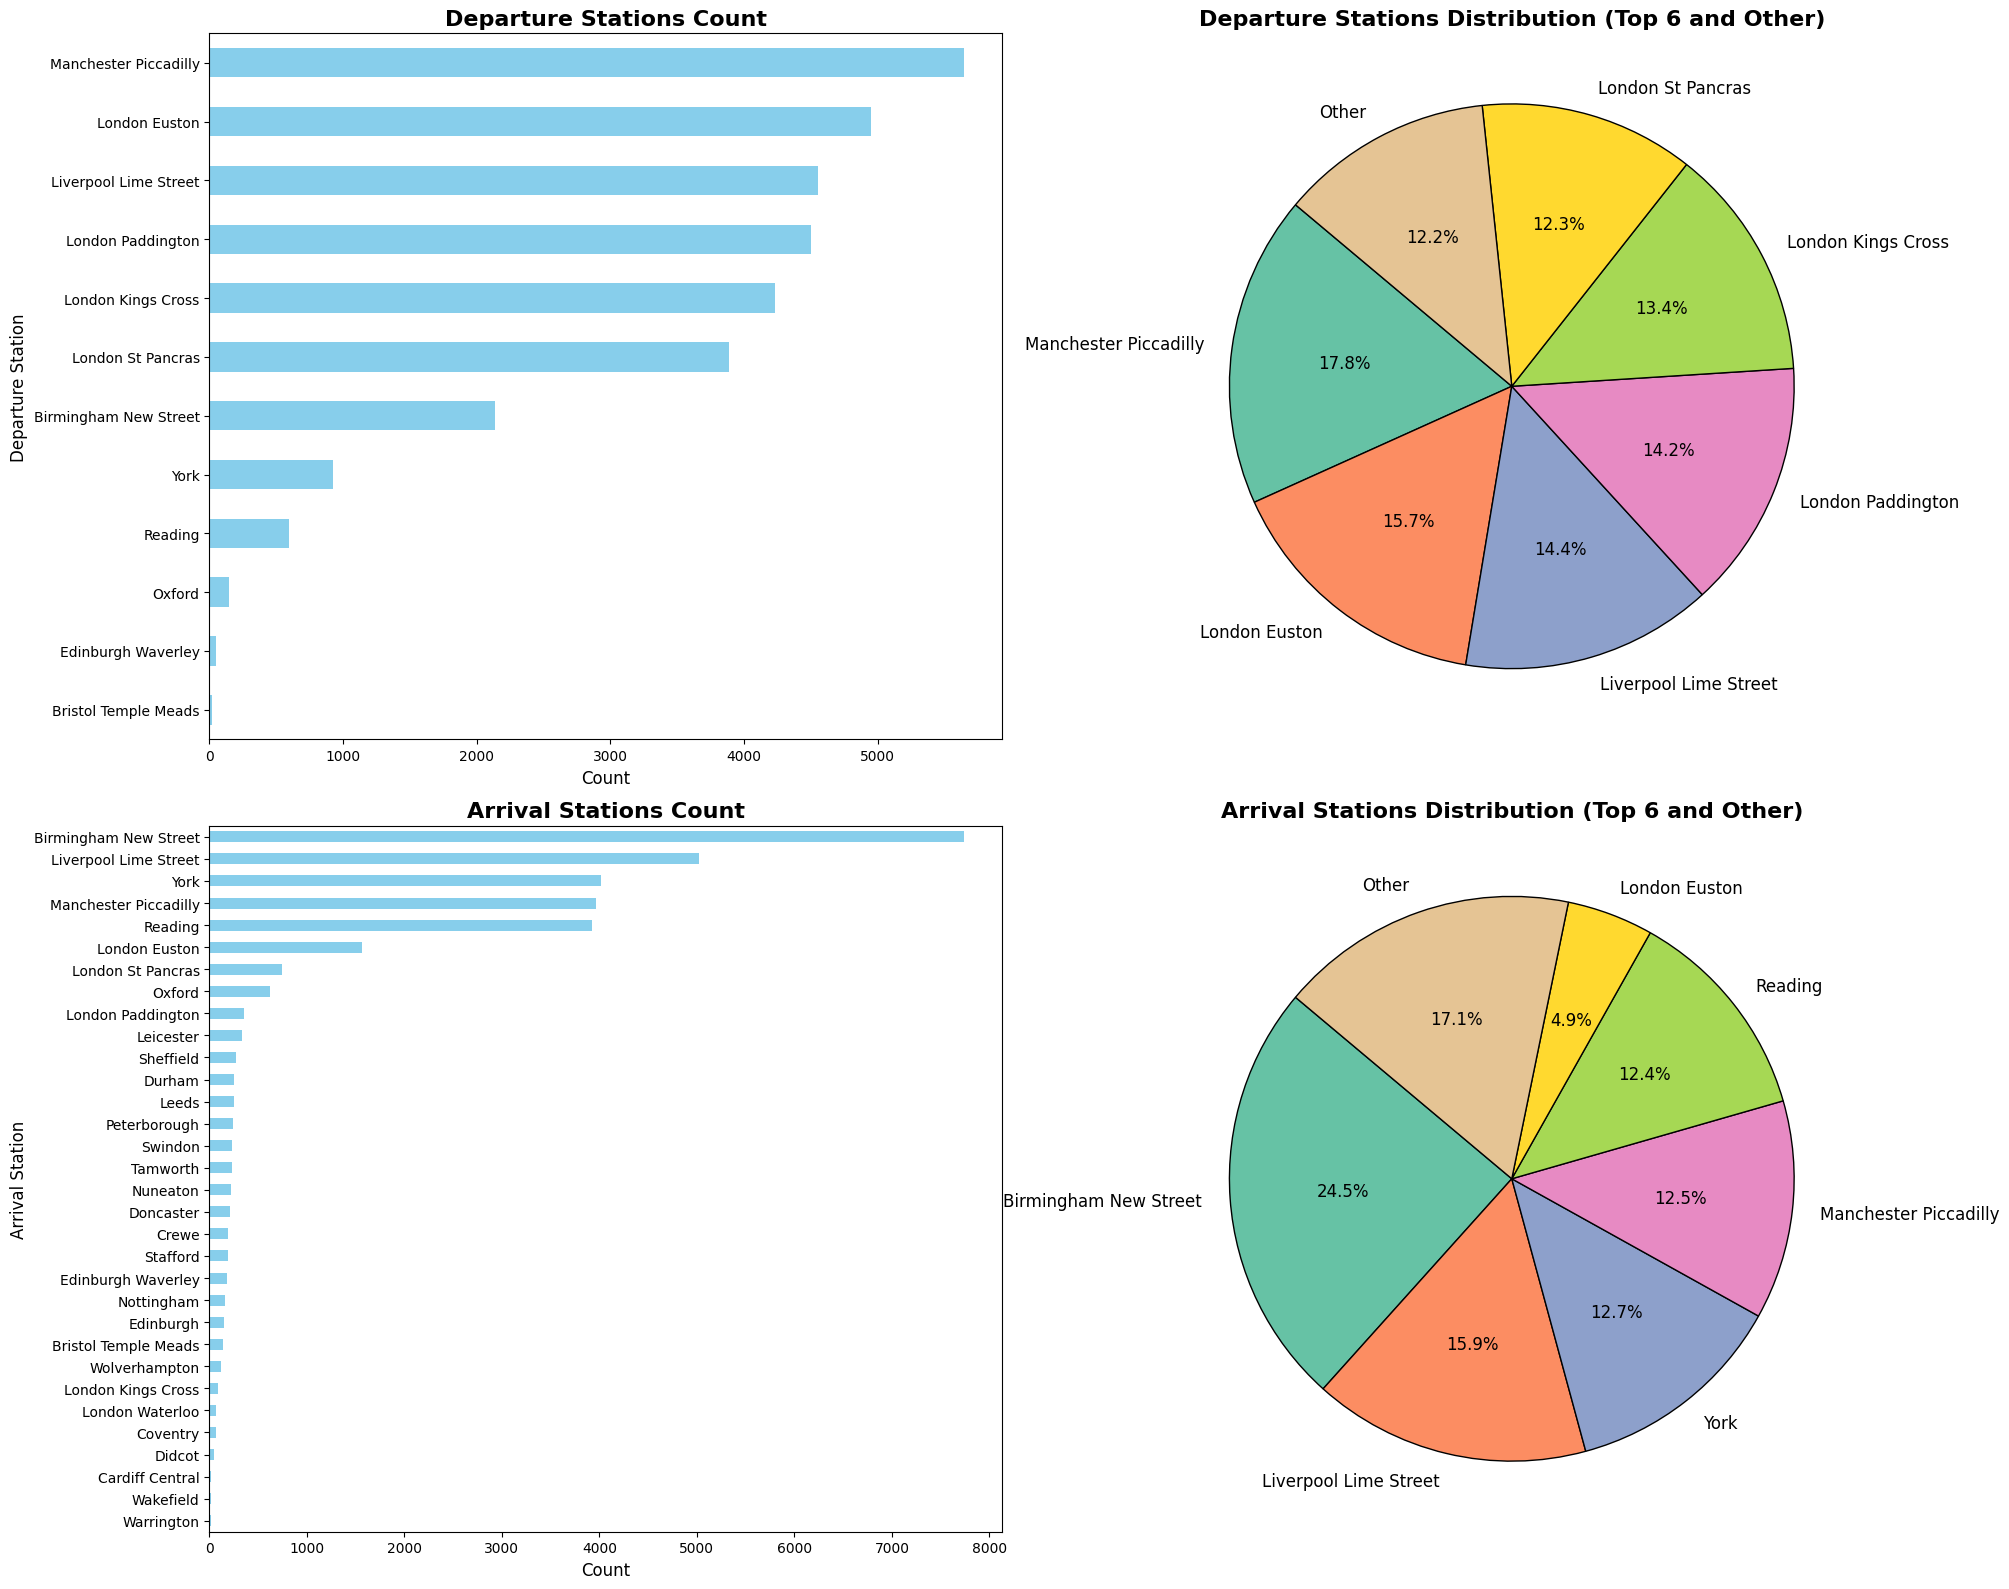

In [ ]:
departure_counts = dataset1['Departure.Station'].value_counts()

# Extracting the top 6 departure stations and grouping the rest as 'Other'
top_departures = departure_counts.head(6)
other_departures_count = departure_counts[6:].sum()
top_departures['Other'] = other_departures_count
# Getting the count of arrivals
station_counts = dataset1['Arrival.Station'].value_counts()
arrival_counts = dataset1['Arrival.Station'].value_counts()

# Extract the first 6 major sites and merge the others into "Other"
top_stations = station_counts.head(6)
other_count = station_counts[6:].sum()
top_stations['Other'] = other_count
# Arrival Stations Pie Chart
top_arrivals = arrival_counts.head(6)
other_arrivals_count = arrival_counts[6:].sum()
top_arrivals['Other'] = other_arrivals_count
# Creating subplots with 2 rows and 2 columns with updated requirements
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Departure Stations Horizontal Bar Chart - Sorted from high to low
departure_counts.sort_values(ascending=True).plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Departure Stations Count', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Count', fontsize=12)
axes[0, 0].set_ylabel('Departure Station', fontsize=12)

# Departure Stations Pie Chart
top_departures.plot(kind='pie',
                    autopct='%1.1f%%',
                    colors=plt.cm.Set2(range(len(top_departures))),
                    startangle=140,
                    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
                    textprops={'fontsize': 12},
                    ax=axes[0, 1])

axes[0, 1].set_title('Departure Stations Distribution (Top 6 and Other)', fontsize=16, fontweight='bold')
axes[0, 1].set_ylabel('')

# Arrival Stations Horizontal Bar Chart - Sorted from high to low
arrival_counts.sort_values(ascending=True).plot(kind='barh', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Arrival Stations Count', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Count', fontsize=12)
axes[1, 0].set_ylabel('Arrival Station', fontsize=12)

# Arrival Stations Pie Chart
top_arrivals.plot(kind='pie',
                  autopct='%1.1f%%',
                  colors=plt.cm.Set2(range(len(top_arrivals))),
                  startangle=140,
                  wedgeprops={'edgecolor': 'black', 'linewidth': 1},
                  textprops={'fontsize': 12},
                  ax=axes[1, 1])

axes[1, 1].set_title('Arrival Stations Distribution (Top 6 and Other)', fontsize=16, fontweight='bold')
axes[1, 1].set_ylabel('')

# Adjusting layout for better visual separation
plt.tight_layout()
plt.show()

In [37]:
'''dataset1['Delay'] = (dataset1['Actual.Arrival'] - dataset1['Scheduled.Arrival']).dt.total_seconds() / 60

# Group the data by route and calculate the average delay
avg_delay_per_route = dataset1.groupby(['Departure.Station', 'Arrival.Station'])['Delay'].mean().reset_index()

# Create a new column combining departure and arrival stations for easier plotting
avg_delay_per_route['Route'] = avg_delay_per_route['Departure.Station'] + " to " + avg_delay_per_route['Arrival.Station']

# Plot the average delay per route
plt.figure(figsize=(10, 6))
plt.barh(avg_delay_per_route['Route'], avg_delay_per_route['Delay'], color='skyblue')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.title('Average Delay by Route')
plt.tight_layout()
plt.show()'''

'dataset1[\'Delay\'] = (dataset1[\'Actual.Arrival\'] - dataset1[\'Scheduled.Arrival\']).dt.total_seconds() / 60\n\n# Group the data by route and calculate the average delay\navg_delay_per_route = dataset1.groupby([\'Departure.Station\', \'Arrival.Station\'])[\'Delay\'].mean().reset_index()\n\n# Create a new column combining departure and arrival stations for easier plotting\navg_delay_per_route[\'Route\'] = avg_delay_per_route[\'Departure.Station\'] + " to " + avg_delay_per_route[\'Arrival.Station\']\n\n# Plot the average delay per route\nplt.figure(figsize=(10, 6))\nplt.barh(avg_delay_per_route[\'Route\'], avg_delay_per_route[\'Delay\'], color=\'skyblue\')\nplt.xlabel(\'Average Delay (minutes)\')\nplt.ylabel(\'Route\')\nplt.title(\'Average Delay by Route\')\nplt.tight_layout()\nplt.show()'

In [38]:
'''top_10_delays = avg_delay_per_route.nlargest(10, 'Delay')
plt.figure(figsize=(10, 6))
sns.barplot(y='Route', x='Delay', data=top_10_delays, palette='viridis')
plt.title('Top 10 Routes with the Most Average Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.show()'''

"top_10_delays = avg_delay_per_route.nlargest(10, 'Delay')\nplt.figure(figsize=(10, 6))\nsns.barplot(y='Route', x='Delay', data=top_10_delays, palette='viridis')\nplt.title('Top 10 Routes with the Most Average Delay')\nplt.xlabel('Average Delay (minutes)')\nplt.ylabel('Route')\nplt.show()"

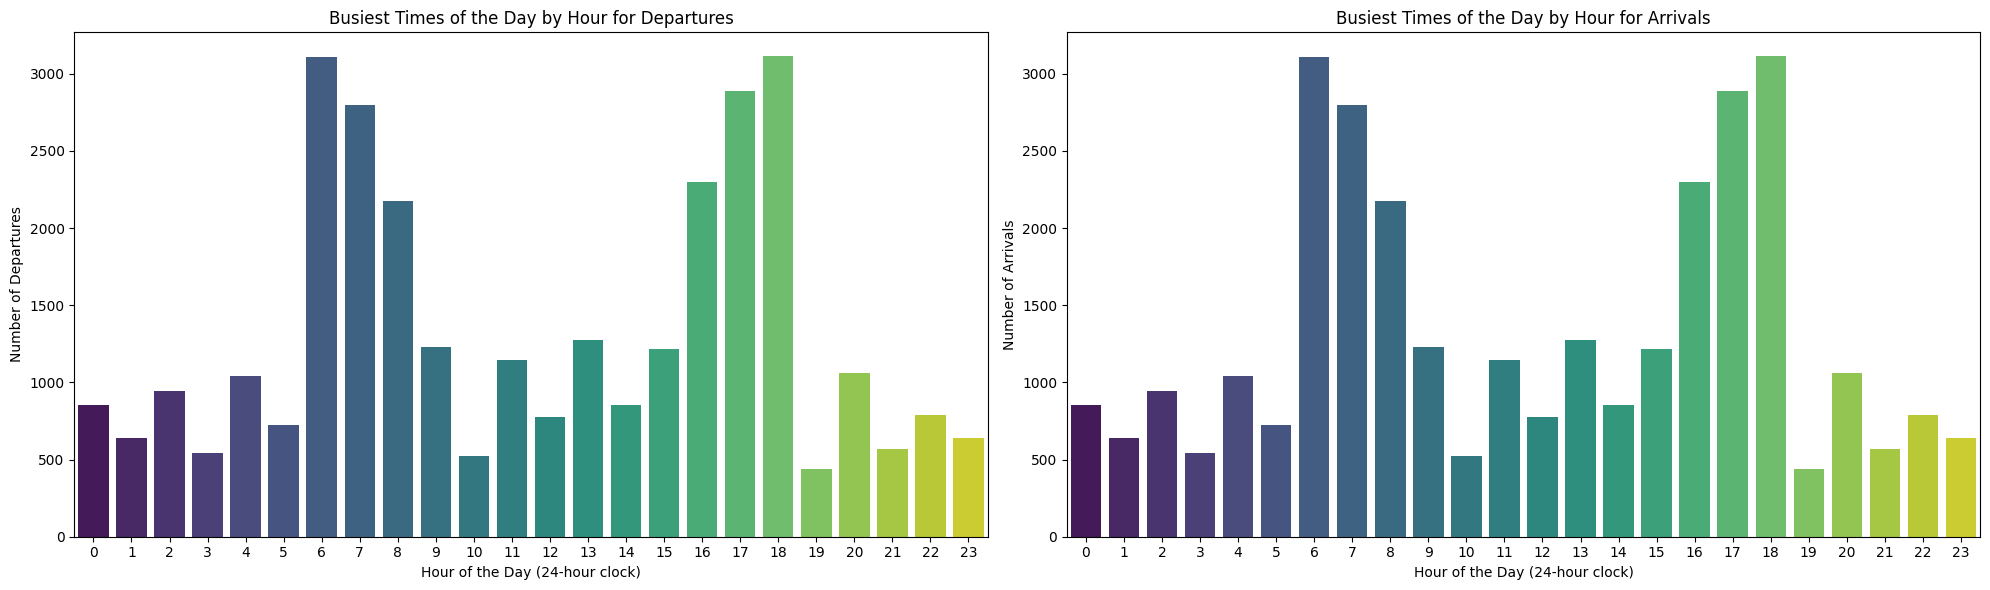

In [39]:
# Grouping by hour to count the number of departures at each hour
hourly_counts = pd.to_datetime(dataset1['Departure']).dt.hour.value_counts().sort_index()
arrival_hourly_counts = dataset1['Departure'].dt.hour.value_counts().sort_index()

# Creating subplots for Departure and Arrival busy times
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting busy times for Departures
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis', ax=axes[0])
axes[0].set_title('Busiest Times of the Day by Hour for Departures')
axes[0].set_xlabel('Hour of the Day (24-hour clock)')
axes[0].set_ylabel('Number of Departures')
axes[0].set_xticks(range(0, 24))

# Plotting busy times for Arrivals
sns.barplot(x=arrival_hourly_counts.index, y=arrival_hourly_counts.values, palette='viridis', ax=axes[1])
axes[1].set_title('Busiest Times of the Day by Hour for Arrivals')
axes[1].set_xlabel('Hour of the Day (24-hour clock)')
axes[1].set_ylabel('Number of Arrivals')
axes[1].set_xticks(range(0, 24))

# Adjusting layout for better visual separation
plt.tight_layout()
plt.show()

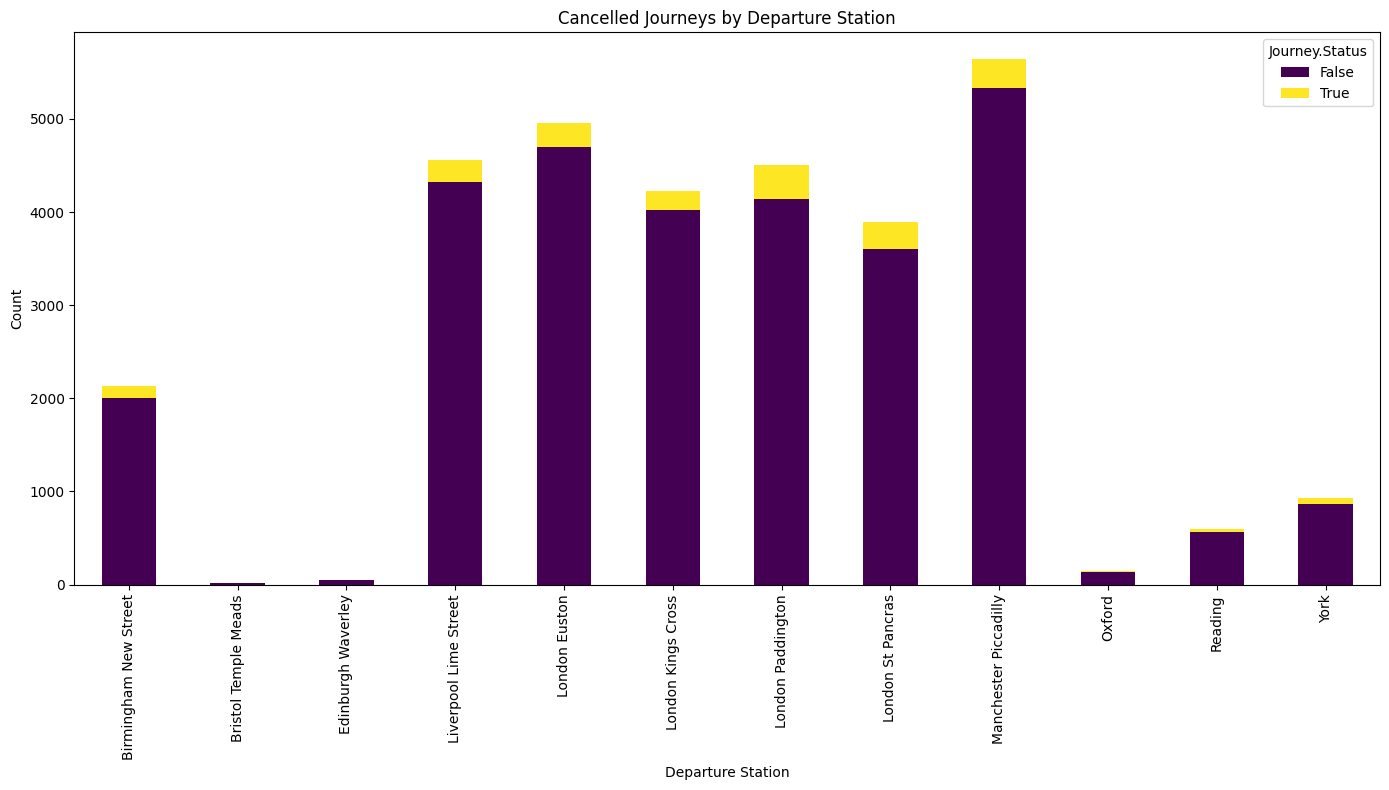

In [ ]:
# Use crosstab to create a crosstab between cancellations and departures
cancel_departure_crosstab = pd.crosstab(dataset1['Departure.Station'], ( dataset1['Journey.Status'] == 'Cancelled'))

# Plotting cross-tabulation results in stacked bar charts
cancel_departure_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Cancelled Journeys by Departure Station')
plt.xlabel('Departure Station')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate tabs to better display departure station names
plt.tight_layout()
plt.show()


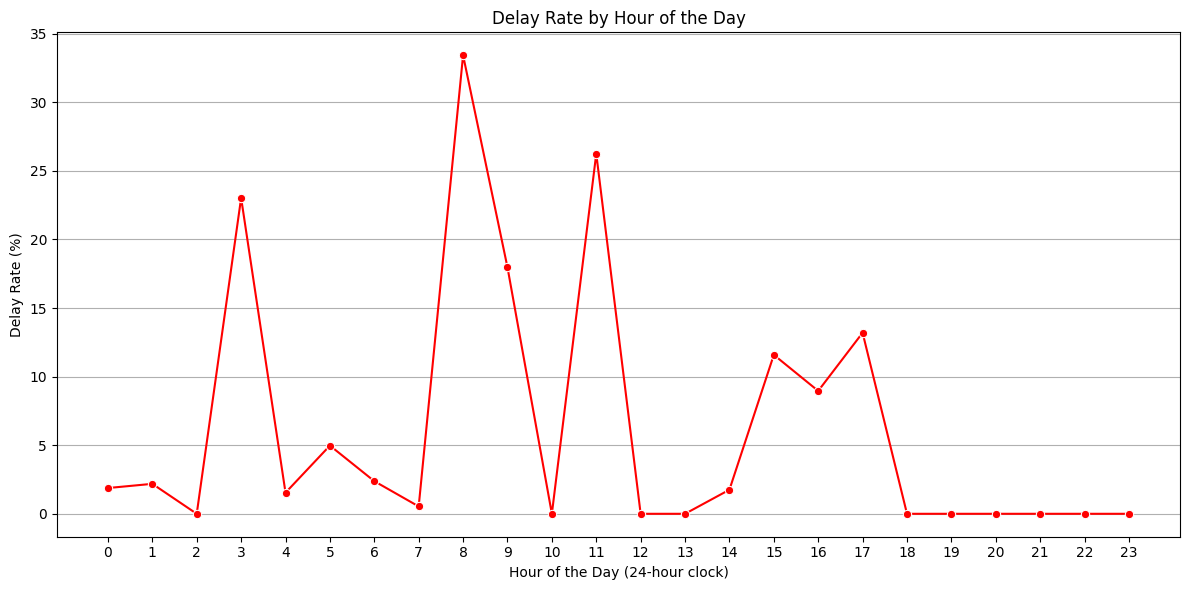

In [ ]:


# Create a cross-tabulation to calculate the hourly delay rate
delay_crosstab = pd.crosstab(pd.to_datetime(dataset1['Departure']).dt.hour, dataset1['Journey.Status'], normalize='index') * 100

# Charting of hourly delay rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=delay_crosstab['Delayed'], marker='o', color='red')
plt.title('Delay Rate by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Delay Rate (%)')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [42]:
# Count the number of starts and ends for each station
start_counts = dataset1['Departure.Station'].value_counts()
end_counts = dataset1['Arrival.Station'].value_counts()

# Creating a DataFrame to merge both counts
station_summary = pd.DataFrame({
    'Depature': start_counts,
    'Arrival': end_counts
}).fillna(0).astype(int)

# Resetting index to create a station summary table
station_summary.rename(columns={'index': 'Station'}, inplace=True)

# Sorting the table by Starts in descending order
station_summary_sorted = station_summary.sort_values(by='Depature', ascending=False)

# Displaying the summary table
station_summary_sorted


,Depature,Arrival
Manchester Piccadilly,5647,3965
London Euston,4952,1564
Liverpool Lime Street,4556,5020
London Paddington,4500,351
London Kings Cross,4229,84
London St Pancras,3890,748
Birmingham New Street,2135,7740
York,925,4018
Reading,594,3920
Oxford,144,623


In [43]:
df_transposed = station_summary.transpose()

# Resetting index to make the columns readable
df_transposed.reset_index(inplace=True)


In [44]:
df_transposed

,index,Birmingham New Street,Bristol Temple Meads,Cardiff Central,Coventry,Crewe,Didcot,Doncaster,Durham,Edinburgh,...,Peterborough,Reading,Sheffield,Stafford,Swindon,Tamworth,Wakefield,Warrington,Wolverhampton,York
0,Depature,2135,16,0,0,0,0,0,0,0,...,0,594,0,0,0,0,0,0,0,925
1,Arrival,7740,144,16,65,193,48,211,257,153,...,242,3920,272,190,228,227,15,15,115,4018


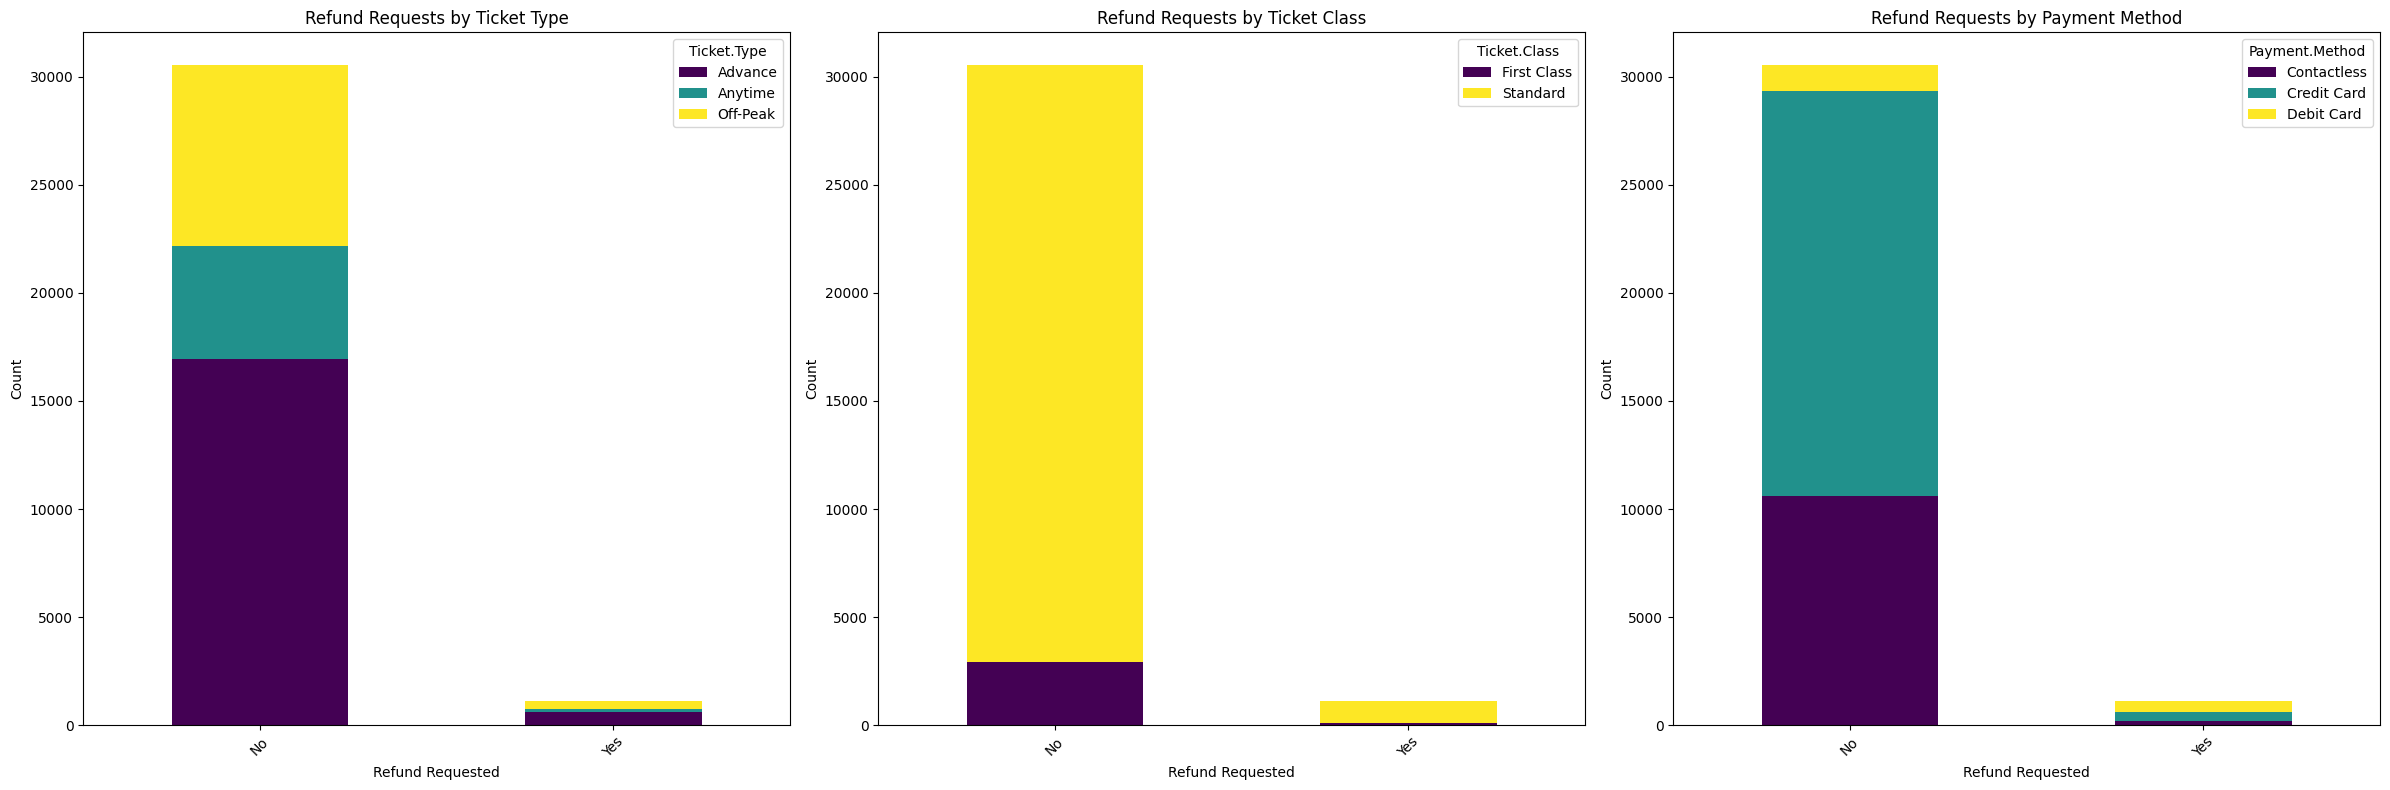

In [45]:
# Using crosstab to analyze relationships between different columns and refunds
# Creating crosstab tables for Refund Request with Ticket Type, Ticket Class, and Payment Method
refund_ticket_type = pd.crosstab(dataset1['Refund.Request'], dataset1['Ticket.Type'])
refund_ticket_class = pd.crosstab(dataset1['Refund.Request'], dataset1['Ticket.Class'])
refund_payment_method = pd.crosstab(dataset1['Refund.Request'], dataset1['Payment.Method'])

# Plotting crosstabs as stacked bar charts
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Refund vs Ticket Type
refund_ticket_type.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Refund Requests by Ticket Type')
axes[0].set_xlabel('Refund Requested')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Refund vs Ticket Class
refund_ticket_class.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Refund Requests by Ticket Class')
axes[1].set_xlabel('Refund Requested')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Refund vs Payment Method
refund_payment_method.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title('Refund Requests by Payment Method')
axes[2].set_xlabel('Refund Requested')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Adjusting layout for better visual separation
plt.tight_layout()
plt.show()


C:\Users\murui\AppData\Local\Temp\ipykernel_112596\1938197630.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Price', y='Refund.Request', data=dataset1, palette='viridis', alpha=0.6, ax=axes[1, 1])


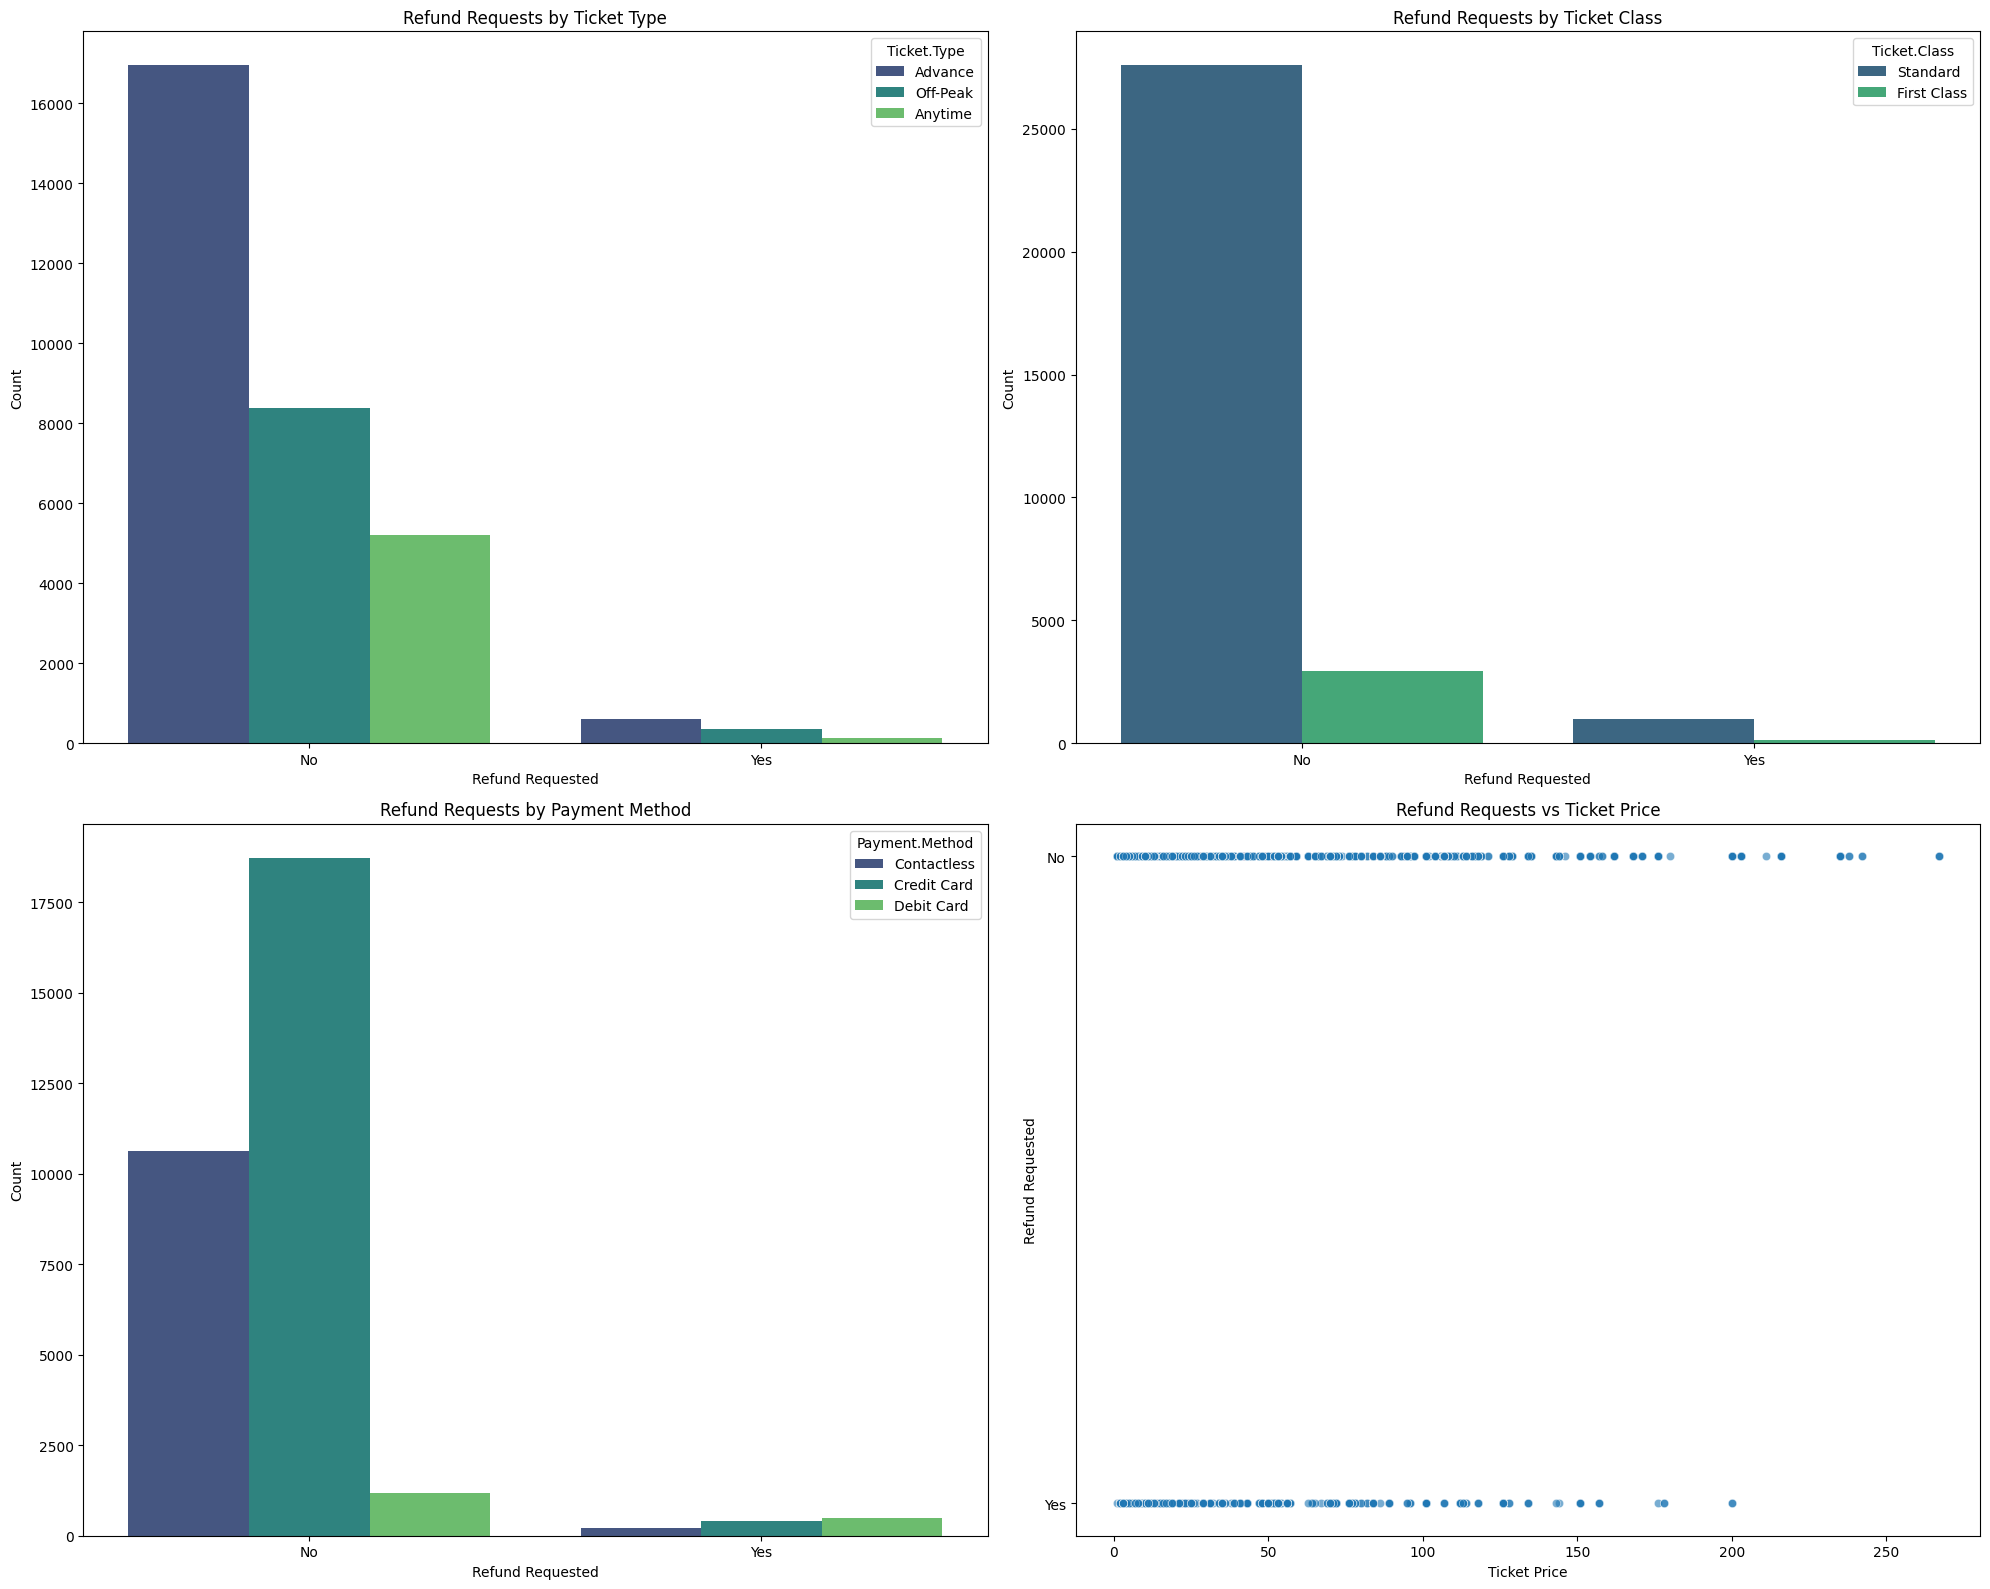

In [46]:
# Adding a scatter plot for Refund Requests vs Ticket Price and creating a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Refund Requests by Ticket Type
sns.countplot(x='Refund.Request', hue='Ticket.Type', data=dataset1, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Refund Requests by Ticket Type')
axes[0, 0].set_xlabel('Refund Requested')
axes[0, 0].set_ylabel('Count')

# Plot 2: Refund Requests by Ticket Class
sns.countplot(x='Refund.Request', hue='Ticket.Class', data=dataset1, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Refund Requests by Ticket Class')
axes[0, 1].set_xlabel('Refund Requested')
axes[0, 1].set_ylabel('Count')

# Plot 3: Refund Requests by Payment Method
sns.countplot(x='Refund.Request', hue='Payment.Method', data=dataset1, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Refund Requests by Payment Method')
axes[1, 0].set_xlabel('Refund Requested')
axes[1, 0].set_ylabel('Count')

# Plot 4: Scatter Plot of Refund Request vs Ticket Price
sns.scatterplot(x='Price', y='Refund.Request', data=dataset1, palette='viridis', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Refund Requests vs Ticket Price')
axes[1, 1].set_xlabel('Ticket Price')
axes[1, 1].set_ylabel('Refund Requested')

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()


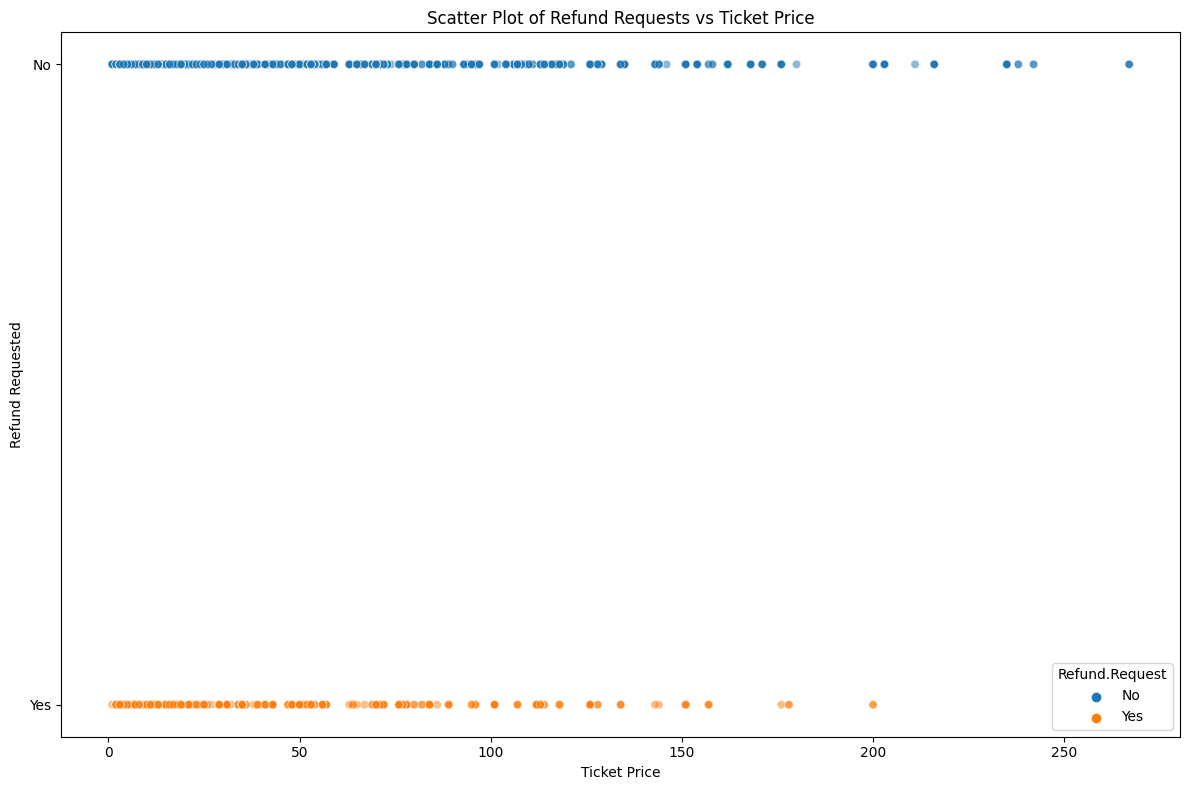

In [47]:
# Creating a scatter plot to visualize the relationship between Refund Request and Price
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset1, x='Price', y='Refund.Request', hue='Refund.Request', alpha=0.5)
plt.title('Scatter Plot of Refund Requests vs Ticket Price')
plt.xlabel('Ticket Price')
plt.ylabel('Refund Requested')
plt.tight_layout()
plt.show()


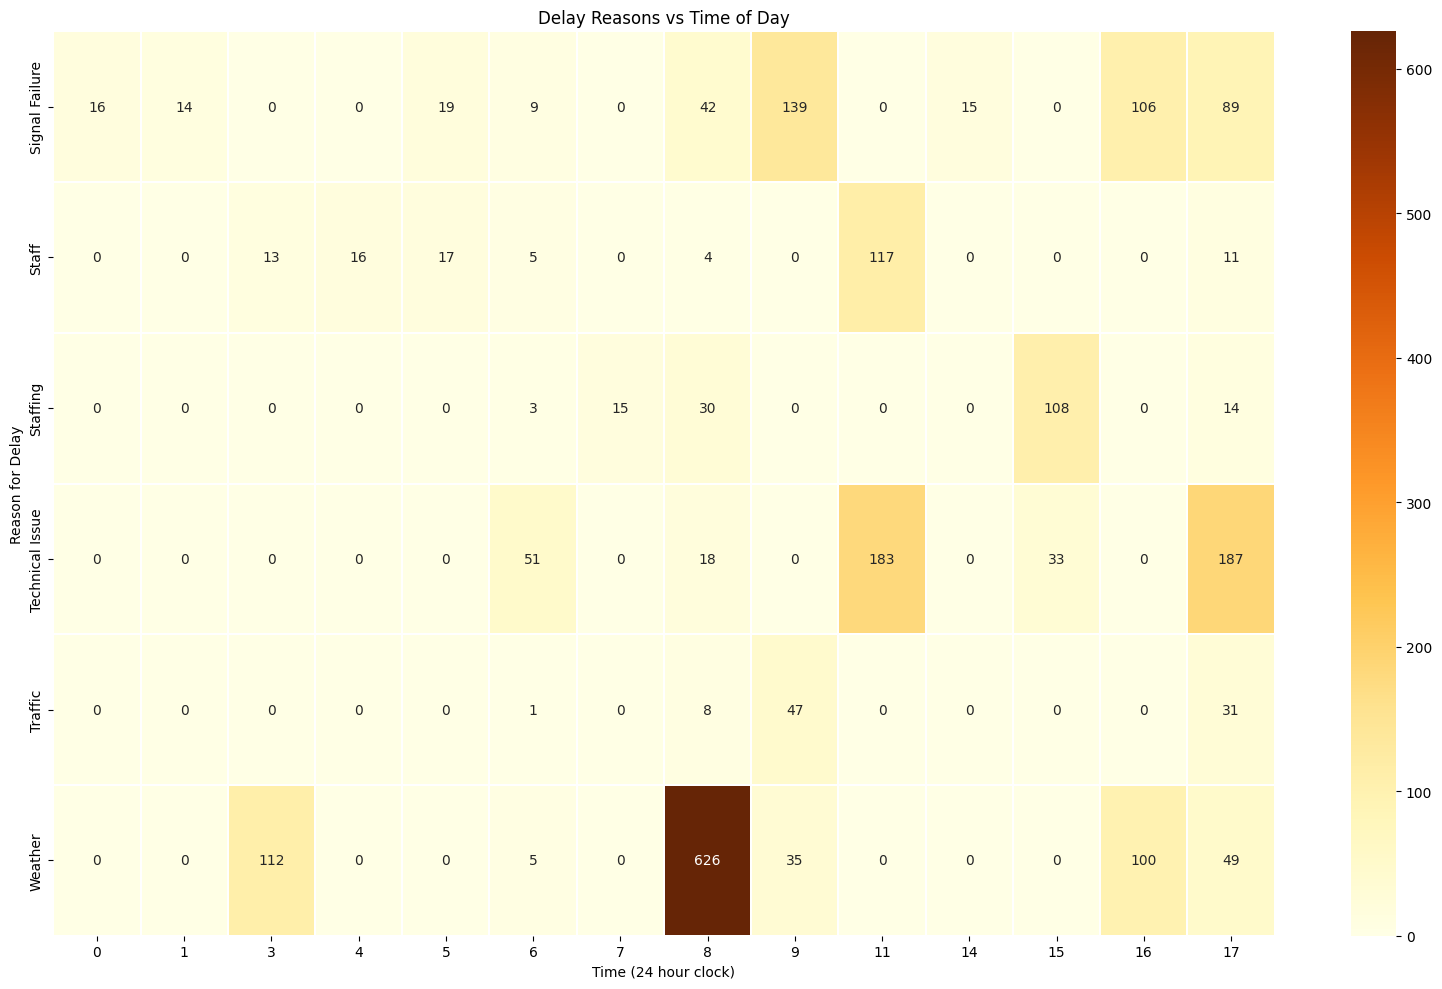

In [ ]:

# Creating Data Copies
dataset_copy = dataset1.copy()

# Withdrawal time hour information
dataset_copy['Departure.Hour'] = pd.to_datetime(dataset_copy['Departure']).dt.hour

# Create data containing the cause and time of the delay
delay_data = dataset_copy[dataset_copy['Journey.Status'] == 'Delayed']
delay_reason_hour = delay_data.groupby(['Reason.for.Delay', 'Departure.Hour']).size().reset_index(name='Counts')

# Create a pivot table where the rows are the reasons for the delays, the columns are the times, and the values are the number of delays in each time period
pivot_table_delay = delay_reason_hour.pivot_table(index='Reason.for.Delay', columns='Departure.Hour', values='Counts', aggfunc='sum').fillna(0)

# Drawing heat maps
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_delay, cmap='YlOrBr', linewidths=0.3, annot=True, fmt=".0f")
plt.title('Delay Reasons vs Time of Day')
plt.xlabel('Time (24 hour clock)')
plt.ylabel('Reason for Delay')
plt.tight_layout()
plt.show()


Relationship between payment method and card purchase method

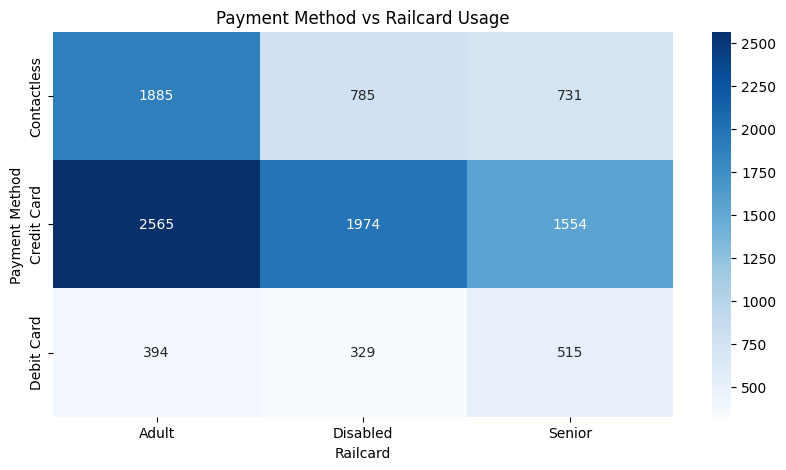

In [49]:
payment_railcard_ct = pd.crosstab(dataset1['Payment.Method'], dataset1['Railcard'])
plt.figure(figsize=(10, 5))
sns.heatmap(payment_railcard_ct, annot=True, cmap='Blues', fmt='d')
plt.title('Payment Method vs Railcard Usage')
plt.xlabel('Railcard')
plt.ylabel('Payment Method')
plt.show()

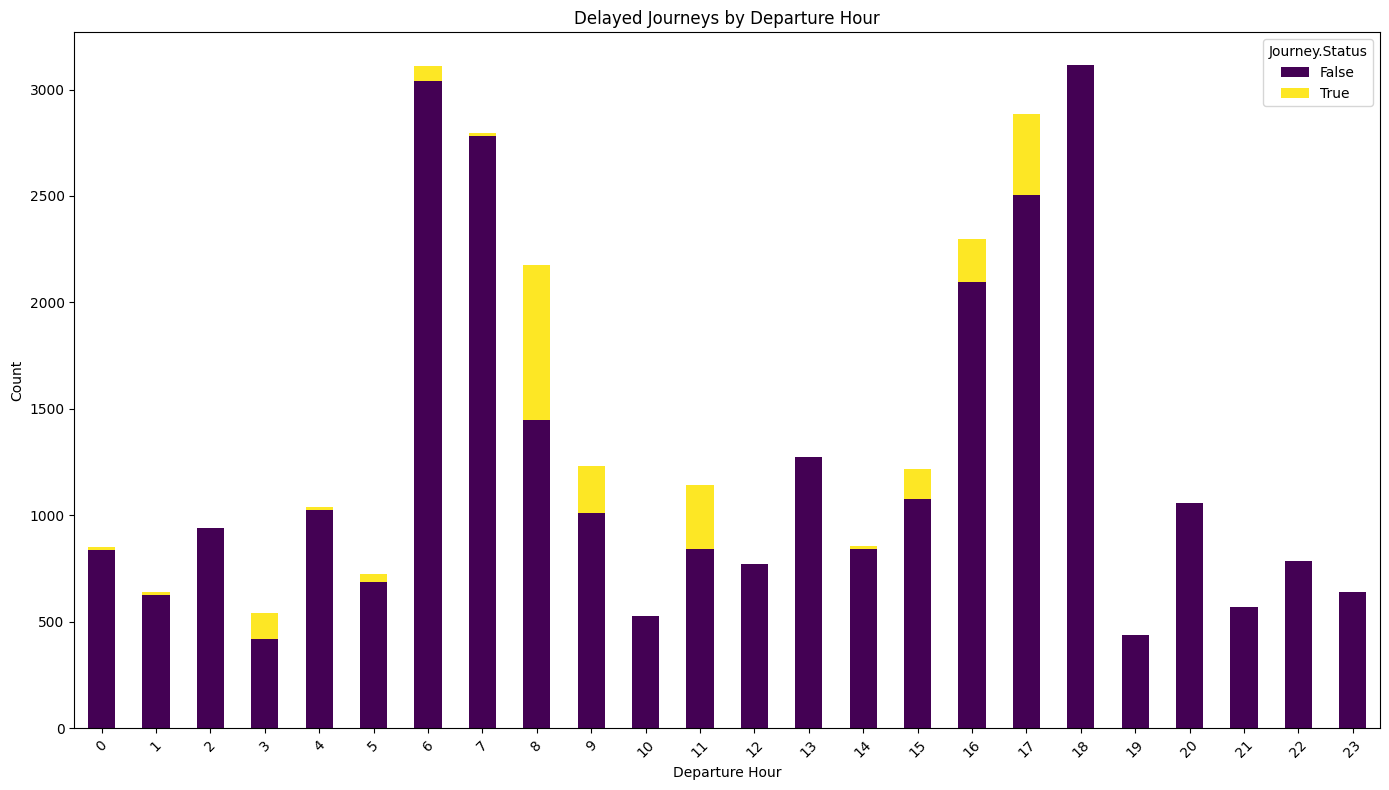

In [50]:
# Using crosstab to analyze the relationship between Delay and Departure Hour

# Creating crosstab for Delayed journeys and Departure Hour
delay_hour_crosstab = pd.crosstab(pd.to_datetime(dataset1['Departure']).dt.hour, (dataset1['Journey.Status'] == 'Delayed'))

# Plotting the crosstab result as a stacked bar chart
delay_hour_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Delayed Journeys by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


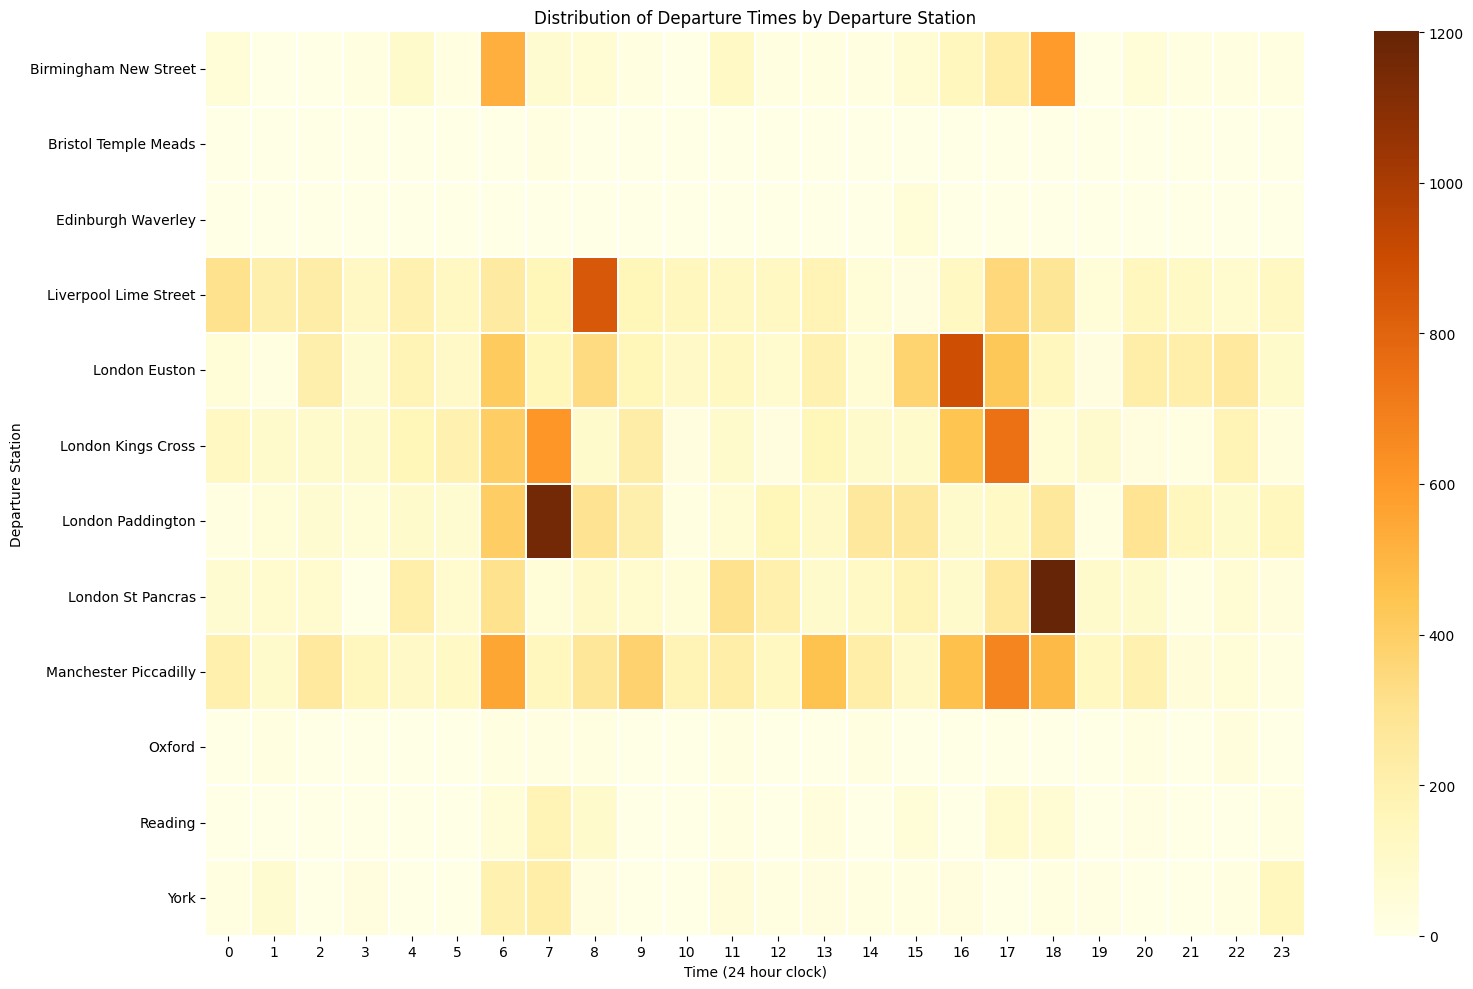

In [ ]:
# Create a new dataset to prevent changes to the original dataset
dataset_copy = dataset1.copy()

# Withdrawal time hour information
dataset_copy['Departure.Hour'] = pd.to_datetime(dataset_copy['Departure']).dt.hour

# Create a DataFrame with origin, arrival and time.
heatmap_data = dataset_copy.groupby(['Departure.Station', 'Arrival.Station', 'Departure.Hour']).size().reset_index(name='Counts')

# Create a pivot table where the rows are origins, the columns are times, and the values are the number of departures for each time period
pivot_table = heatmap_data.pivot_table(index='Departure.Station', columns='Departure.Hour', values='Counts', aggfunc='sum').fillna(0)

# Drawing heat maps
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlOrBr', linewidths=0.3)
plt.title('Distribution of Departure Times by Departure Station')
plt.xlabel('Time (24 hour clock)')
plt.ylabel('Departure Station')
plt.tight_layout()
plt.show()

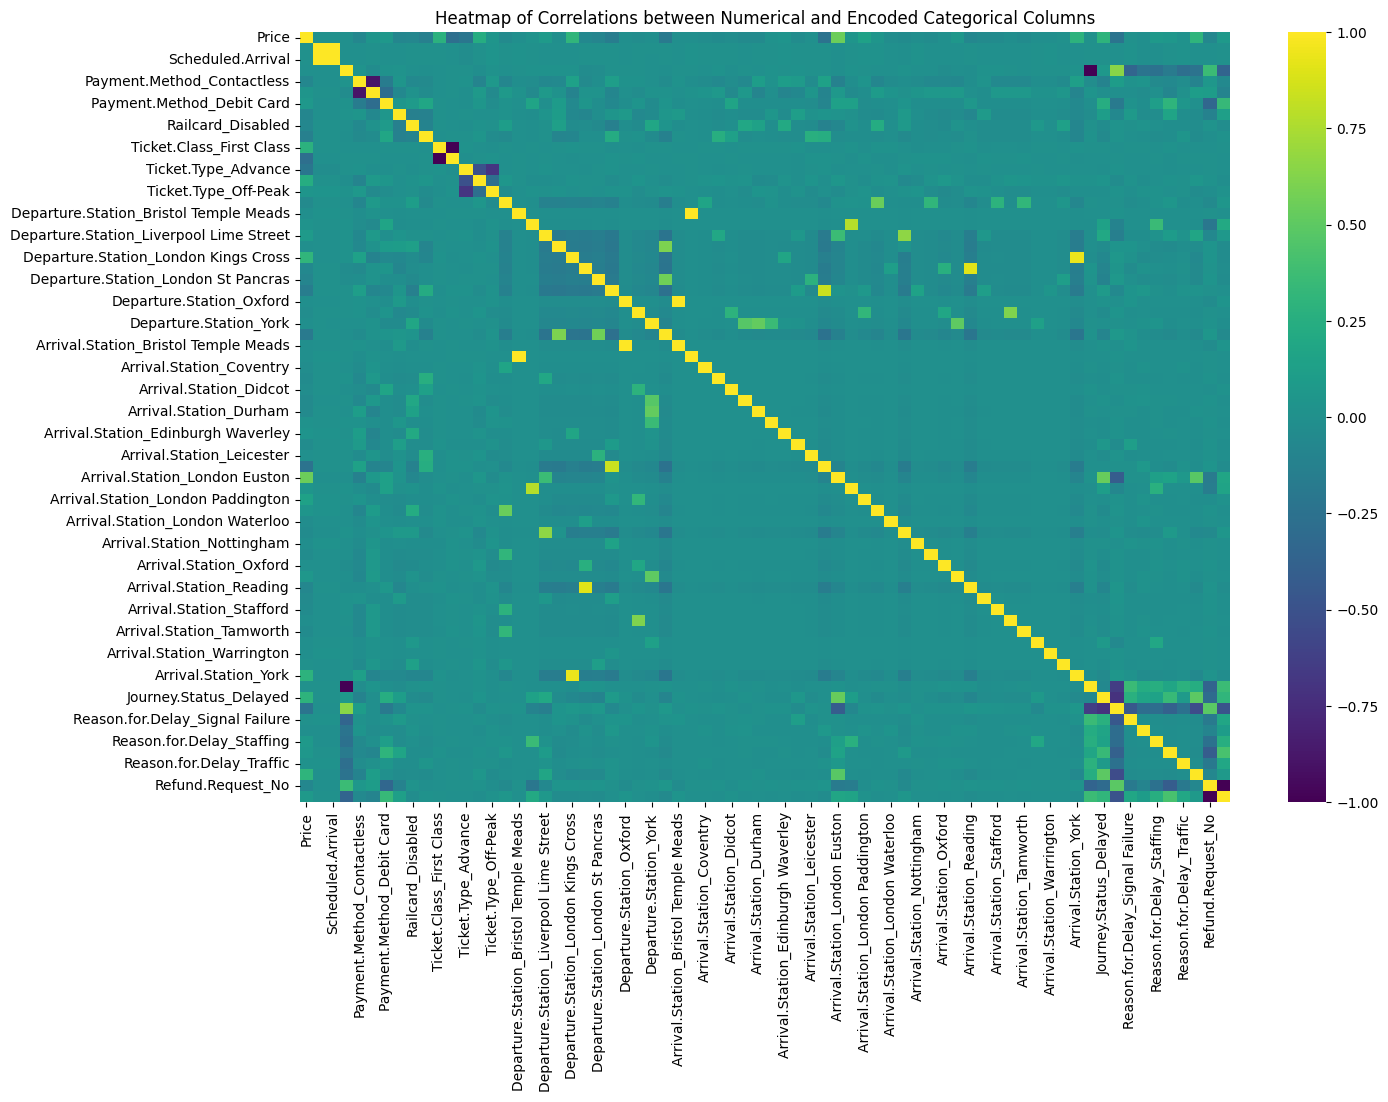

In [52]:
dataset_encoded = pd.get_dummies(dataset1)

# Calculate the correlation matrix for the encoded dataset
correlation_matrix = dataset_encoded.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title('Heatmap of Correlations between Numerical and Encoded Categorical Columns')
plt.show()

### Add column

In [53]:
dataset1['DelayInMinutes'] = (dataset1['Actual.Arrival'] - dataset1['Scheduled.Arrival']).dt.total_seconds() / 60
dataset1.loc[dataset1['Journey.Status'] == 'On Time', 'DelayInMinutes'] = pd.NA

In [54]:
dataset1

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN,No,NaN
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,5.0
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,NaN,No,NaN
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,NaN,No,NaN
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,On Time,NaN,No,NaN
31635,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,On Time,NaN,No,NaN
31636,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,On Time,NaN,No,NaN
31637,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,On Time,NaN,No,NaN


#### Predict Price

In [55]:
dataset_NOT_ON_TIME = dataset1[dataset1['Journey.Status'] != 'On Time']

In [56]:
dataset_NOT_ON_TIME['MediumPrice'] = (dataset_NOT_ON_TIME['Price'] > 10) & (dataset_NOT_ON_TIME['Price'] <= 30)

C:\Users\murui\AppData\Local\Temp\ipykernel_112596\648864483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_NOT_ON_TIME['MediumPrice'] = (dataset_NOT_ON_TIME['Price'] > 10) & (dataset_NOT_ON_TIME['Price'] <= 30)


In [57]:
dataset_NOT_ON_TIME

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes,MediumPrice
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,5.0,True
8,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,Delayed,Signal Failure,No,17.0,False
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,Delayed,Technical Issue,Yes,31.0,False
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,Delayed,Signal Failure,Yes,24.0,False
39,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,Cancelled,Technical Issue,No,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31625,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30 18:45:00,2024-04-30 20:35:00,NaT,Cancelled,Signal Failure,No,NaN,False
31627,Credit Card,Adult,Standard,Anytime,95,London Euston,Manchester Piccadilly,2024-04-30 18:45:00,2024-04-30 20:35:00,NaT,Cancelled,Signal Failure,Yes,NaN,False
31628,Contactless,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 18:45:00,2024-04-30 19:15:00,NaT,Cancelled,Weather,No,NaN,False
31630,Credit Card,NaN,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-04-30 18:45:00,2024-04-30 20:05:00,NaT,Cancelled,Signal Failure,No,NaN,True


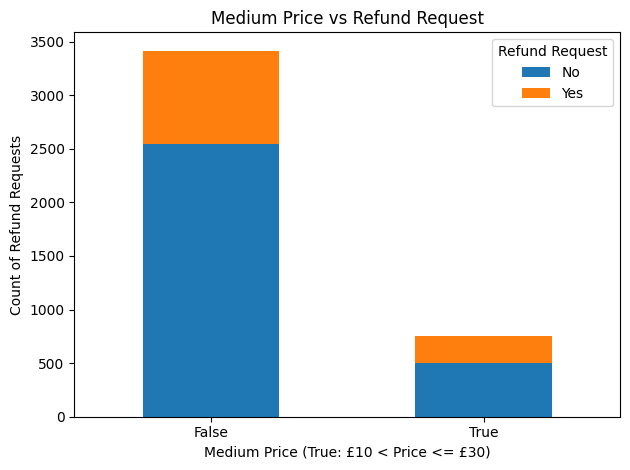

In [ ]:
# Visualising the relationship between MediumPrice and Refund.Request
refund_counts = dataset_NOT_ON_TIME.groupby(['MediumPrice', 'Refund.Request']).size().unstack()

# Plotting bar charts
refund_counts.plot(kind='bar', stacked=True)
plt.title('Medium Price vs Refund Request')
plt.xlabel('Medium Price (True: £10 < Price <= £30)')
plt.ylabel('Count of Refund Requests')
plt.xticks(rotation=0)
plt.legend(title='Refund Request')
plt.tight_layout()

plt.show()

In [59]:
refund_counts

Refund.Request,No,Yes
MediumPrice,,
False,2547,869
True,504,245


In [60]:
dataset_NOT_ON_TIME['Refund.Request.Numeric'] = dataset_NOT_ON_TIME['Refund.Request'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\murui\AppData\Local\Temp\ipykernel_112596\607967127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_NOT_ON_TIME['Refund.Request.Numeric'] = dataset_NOT_ON_TIME['Refund.Request'].apply(lambda x: 1 if x == 'Yes' else 0)


C:\Users\murui\AppData\Local\Temp\ipykernel_112596\3540506844.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='MediumPrice', y='Refund.Request.Numeric', data=dataset_NOT_ON_TIME, ci=None)


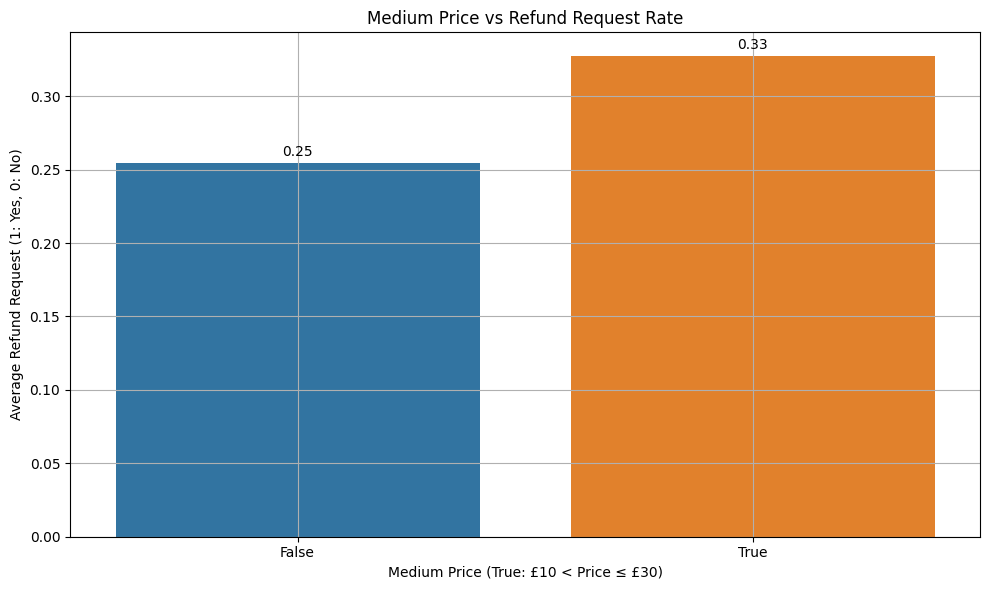

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MediumPrice', y='Refund.Request.Numeric', data=dataset_NOT_ON_TIME, ci=None)

# Adding numerical labels above the chart
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8),
                textcoords='offset points')

plt.title('Medium Price vs Refund Request Rate')
plt.xlabel('Medium Price (True: £10 < Price ≤ £30)')
plt.ylabel('Average Refund Request (1: Yes, 0: No)')
plt.xticks([0, 1], ['False', 'True'])
plt.grid(True)
plt.tight_layout()

plt.show()

In [62]:
X = dataset_NOT_ON_TIME[['MediumPrice']]  # predictor variable
y = dataset_NOT_ON_TIME['Refund.Request']  # target variable

In [63]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [64]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]
print(f"intercept: {intercept}")
print(f"coefficient: {coefficient}")

intercept: -1.0747859755983495
coefficient: 0.3513322312644662


In [65]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Manually calculate the probability when the ticket price is £5 and £25
def calculate_probability(price):
    # judgment MediumPrice
    medium_price = 1 if 10 < price <= 30 else 0
    # Calculate the output values of the linear model
    z = intercept + coefficient * medium_price
    # Calculating probabilities using sigmoid functions
    probability = sigmoid(z)
    return probability

# Calculate the probability when the ticket price is £5 and £25
prob_5 = calculate_probability(5)
prob_25 = calculate_probability(25)

print(f"Probability that a traveller with a £5 ticket will request a refund. {prob_5*100:.2f}%")
print(f"Probability that a traveller with a ticket price of £25 will request a refund.{prob_25*100:.2f}%")

Probability that a traveller with a £5 ticket will request a refund. 25.45%
Probability that a traveller with a ticket price of £25 will request a refund.32.66%


In [66]:
sample_data = pd.DataFrame({'MediumPrice': [1 if 10 < 5 <= 30 else 0, 1 if 10 < 25 <= 30 else 0]})
refund_probabilities = model.predict_proba(sample_data)[:, 1]

print(f"Probability that a traveller with a £5 ticket will request a refund: {refund_probabilities[0]:.2f}")
print(f"Probability that a traveller with a ticket price of £25 will request a refund: {refund_probabilities[1]:.2f}")

Probability that a traveller with a £5 ticket will request a refund: 0.25
Probability that a traveller with a ticket price of £25 will request a refund: 0.33


In [67]:
refund_probabilities

array([0.25449399, 0.3266329 ])

### regression model

In [68]:
maven_data = dataset1.copy()
to_predict_data = pd.read_csv('ToPredict.csv')

In [69]:
X = maven_data.drop(['DelayInMinutes','Refund.Request'], axis=1)
y = maven_data['Refund.Request']

In [70]:
# Convert categorical variables using one-hot encoding for correlation analysis
X_numeric = pd.get_dummies(X, drop_first=True)
y = y.replace({'Yes': 1, 'No': 0})

In [71]:
dataset2 = pd.concat([X_numeric, y], axis=1)

In [72]:
dataset2

,Price,Departure,Scheduled.Arrival,Actual.Arrival,Payment.Method_Credit Card,Payment.Method_Debit Card,Railcard_Disabled,Railcard_Senior,Ticket.Class_Standard,Ticket.Type_Anytime,...,Arrival.Station_Wolverhampton,Arrival.Station_York,Journey.Status_Delayed,Journey.Status_On Time,Reason.for.Delay_Staff,Reason.for.Delay_Staffing,Reason.for.Delay_Technical Issue,Reason.for.Delay_Traffic,Reason.for.Delay_Weather,Refund.Request
0,43,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
1,23,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,True,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,0
2,3,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
3,13,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
4,76,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,4,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
31635,10,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
31636,4,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
31637,10,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0


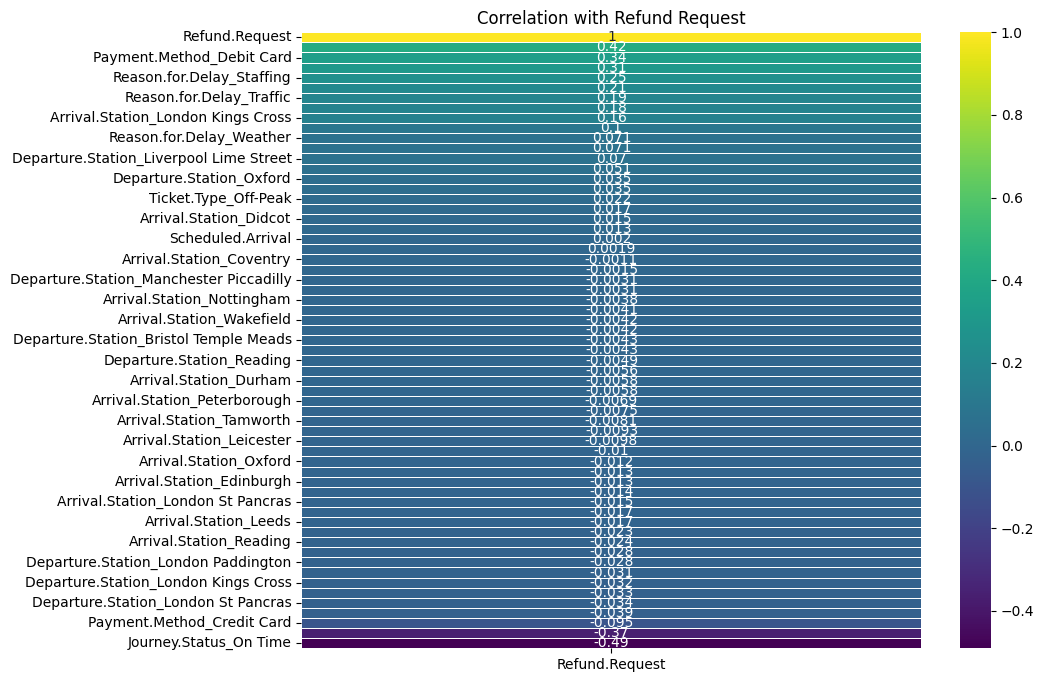

In [73]:
plt.figure(figsize=(10, 8))
corr_matrix = dataset2.corr()
sns.heatmap(corr_matrix[['Refund.Request']].sort_values(by='Refund.Request', ascending=False), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation with Refund Request")
plt.show()

In [74]:
X

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,NaN
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,NaN
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31634,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,On Time,NaN
31635,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,On Time,NaN
31636,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,On Time,NaN
31637,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,On Time,NaN


In [75]:
X = X[['Railcard','Price', 'Payment.Method','Journey.Status']]

In [76]:
X

,Railcard,Price,Payment.Method,Journey.Status
0,Adult,43,Contactless,On Time
1,Adult,23,Credit Card,Delayed
2,NaN,3,Credit Card,On Time
3,NaN,13,Credit Card,On Time
4,NaN,76,Contactless,On Time
...,...,...,...,...
31634,NaN,4,Credit Card,On Time
31635,NaN,10,Contactless,On Time
31636,NaN,4,Credit Card,On Time
31637,NaN,10,Credit Card,On Time


In [77]:
X_numeric = pd.get_dummies(X, drop_first=True)

In [78]:
all_columns = X_numeric.columns

In [79]:
X_numeric

,Price,Railcard_Disabled,Railcard_Senior,Payment.Method_Credit Card,Payment.Method_Debit Card,Journey.Status_Delayed,Journey.Status_On Time
0,43,False,False,False,False,False,True
1,23,False,False,True,False,True,False
2,3,False,False,True,False,False,True
3,13,False,False,True,False,False,True
4,76,False,False,False,False,False,True
...,...,...,...,...,...,...,...
31634,4,False,False,True,False,False,True
31635,10,False,False,False,False,False,True
31636,4,False,False,True,False,False,True
31637,10,False,False,True,False,False,True


In [80]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

In [81]:
logistic_model = LogisticRegression()
lasso_model = Lasso(alpha=0.1)
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [82]:
# Train models
logistic_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [83]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso = np.round(y_pred_lasso).astype(int)
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_tree = np.round(y_pred_tree).astype(int)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf = np.round(y_pred_rf).astype(int)
y_pred_gb = gb_model.predict(X_test)
y_pred_gb = np.round(y_pred_gb).astype(int)

In [84]:

# Evaluate models
def evaluate_model(name, y_true, y_pred, model=None, X_test=None):
    print(f"{name} Evaluation:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    
    # Plot ROC curve if model is provided and can provide probabilities
    if model is not None and hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {name}')
        plt.legend(loc='lower right')
        plt.show()
    
    # Plot residual plot for regression models
    if model is not None and not hasattr(model, 'predict_proba'):
        residuals = y_true - y_pred
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residual Plot for {name}')
        plt.show()
    
    # Plot feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {name}')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()
    
        # Plot predicted vs actual values for regression models to assess fit
    if model is not None and not hasattr(model, 'predict_proba'):
        plt.figure(figsize=(10, 6))
        plt.scatter(y_true, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Fit Line')
        plt.axvline(x=y_true.mean(), color='b', linestyle='--', lw=1, label='Mean of Actual Values')
        plt.axhline(y=y_pred.mean(), color='g', linestyle='--', lw=1, label='Mean of Predicted Values')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Predicted vs Actual Values for {name}')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    
    # Learning curve to assess overfitting
    if model is not None and hasattr(model, 'fit'):
        from sklearn.model_selection import learning_curve
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        train_scores_mean = -train_scores.mean(axis=1)
        test_scores_mean = -test_scores.mean(axis=1)
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training error')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validation error')
        plt.xlabel('Training Size')
        plt.ylabel('Mean Squared Error')
        plt.title(f'Learning Curve for {name}')
        plt.legend(loc='best')
        plt.show()

    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6121
           1       0.89      0.48      0.62       207

    accuracy                           0.98      6328
   macro avg       0.94      0.74      0.81      6328
weighted avg       0.98      0.98      0.98      6328



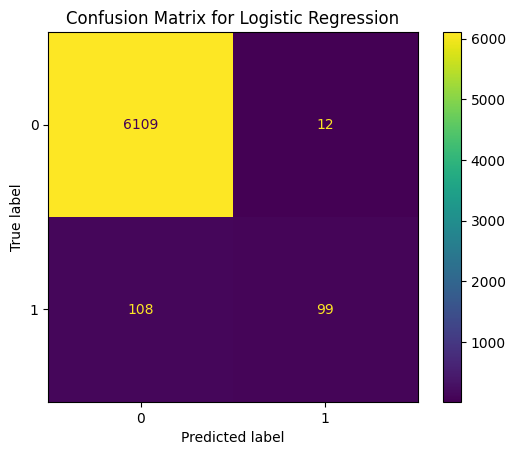

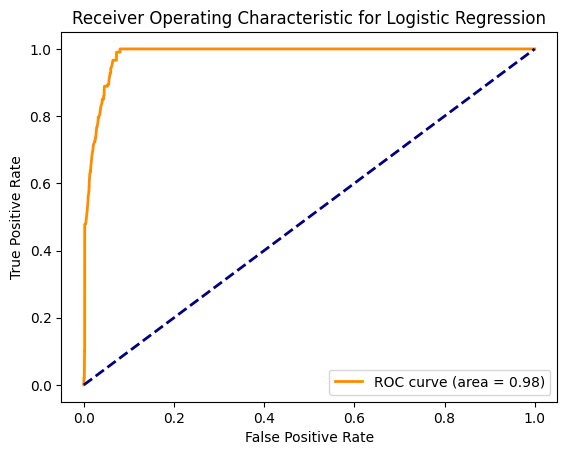

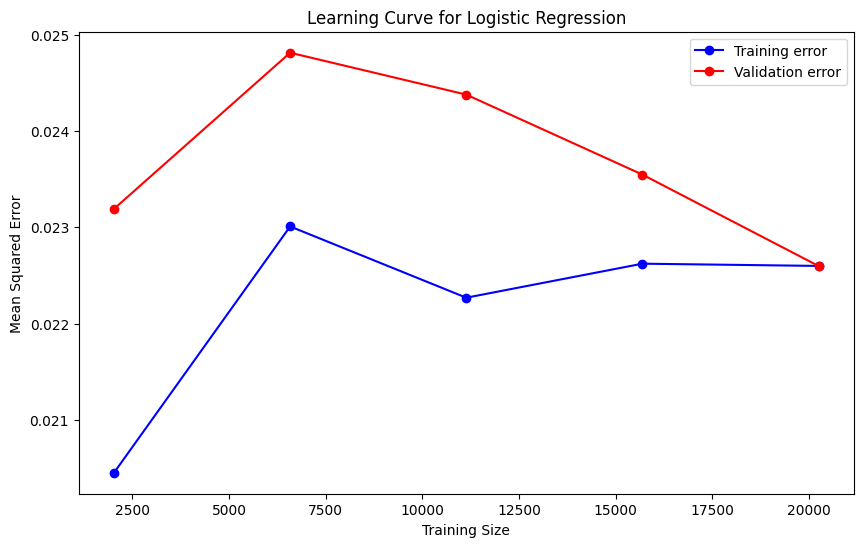

Logistic Regression Evaluation:
Accuracy: 0.98
Precision: 0.89
Recall: 0.48
F1 Score: 0.62


In [85]:
evaluate_model('Logistic Regression', y_test, y_pred_logistic, model=logistic_model, X_test=X_test)

Lasso Regression Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6121
           1       0.00      0.00      0.00       207

    accuracy                           0.97      6328
   macro avg       0.48      0.50      0.49      6328
weighted avg       0.94      0.97      0.95      6328



C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

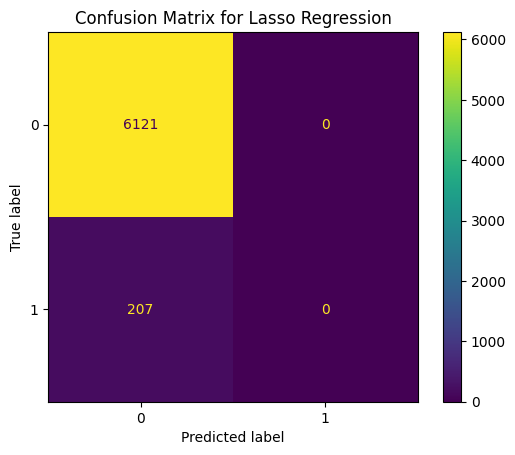

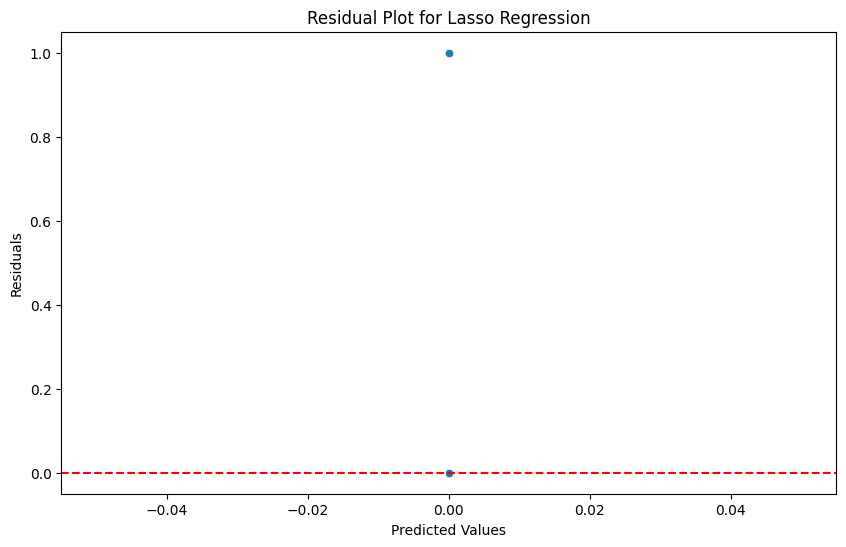

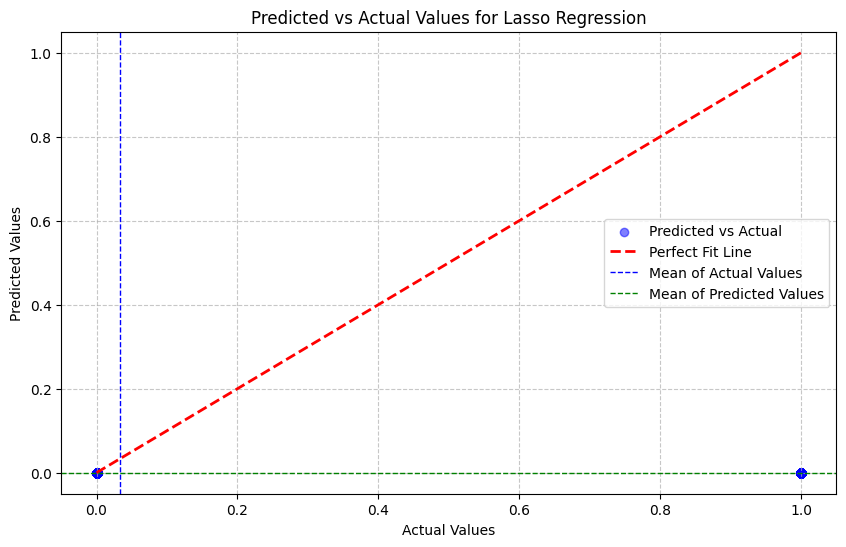

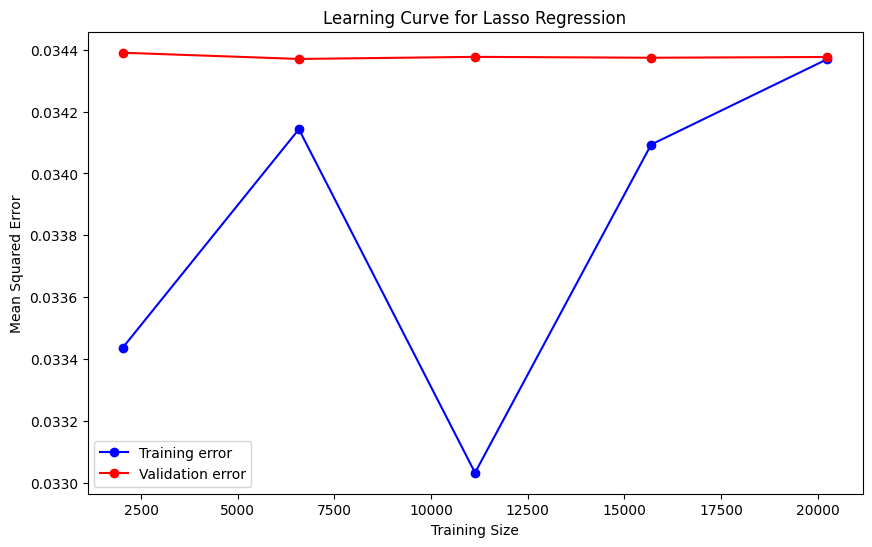

Lasso Regression Evaluation:
Accuracy: 0.97
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
evaluate_model('Lasso Regression', y_test, y_pred_lasso, model=lasso_model)

Decision Tree Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6121
           1       0.86      0.54      0.66       207

    accuracy                           0.98      6328
   macro avg       0.92      0.77      0.83      6328
weighted avg       0.98      0.98      0.98      6328



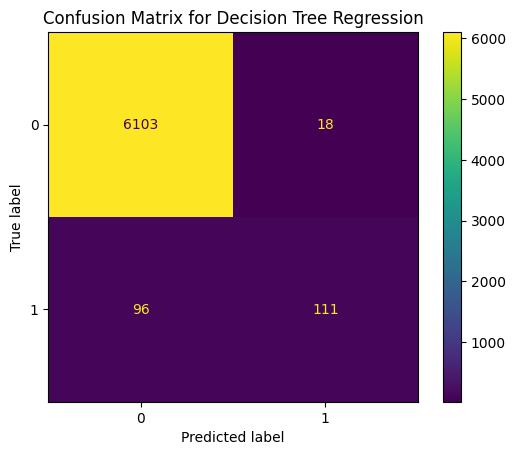

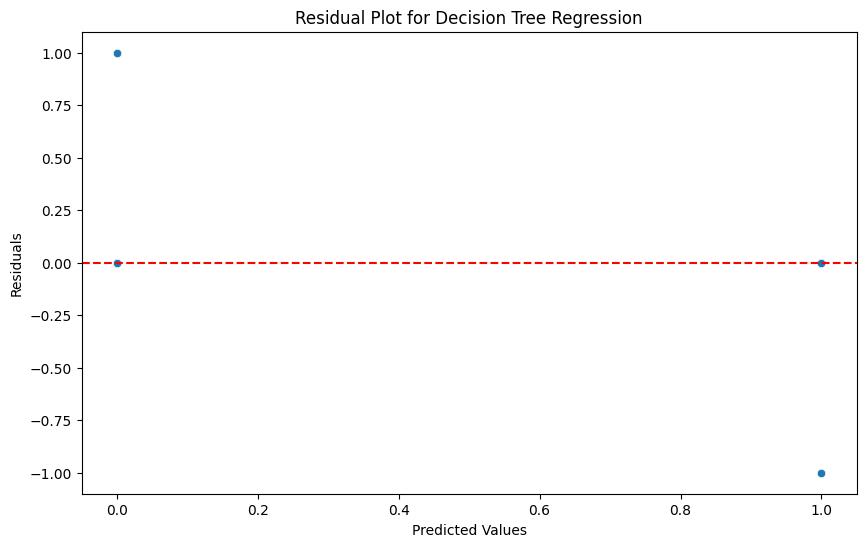

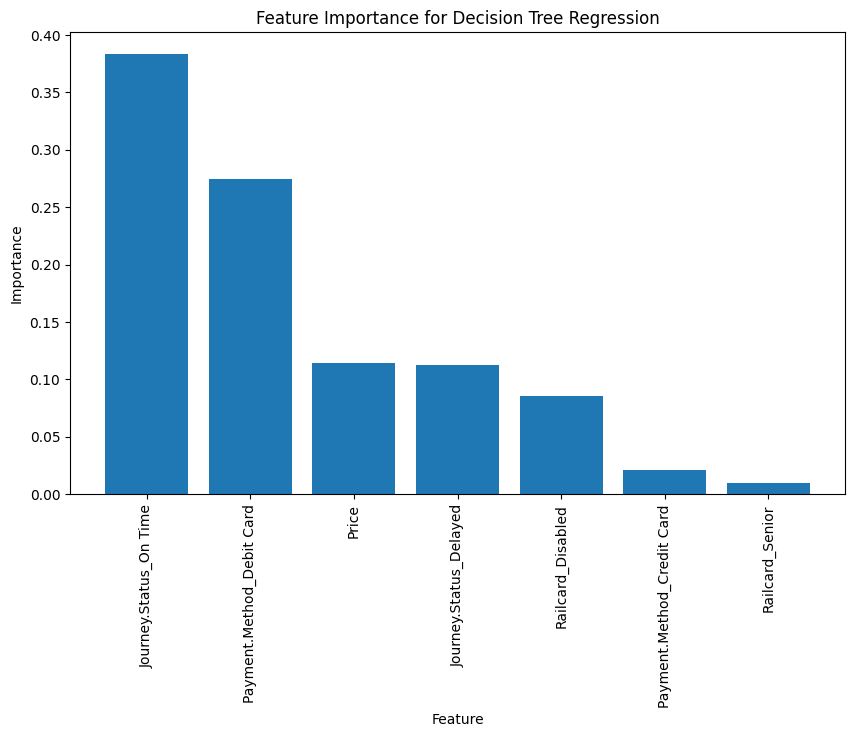

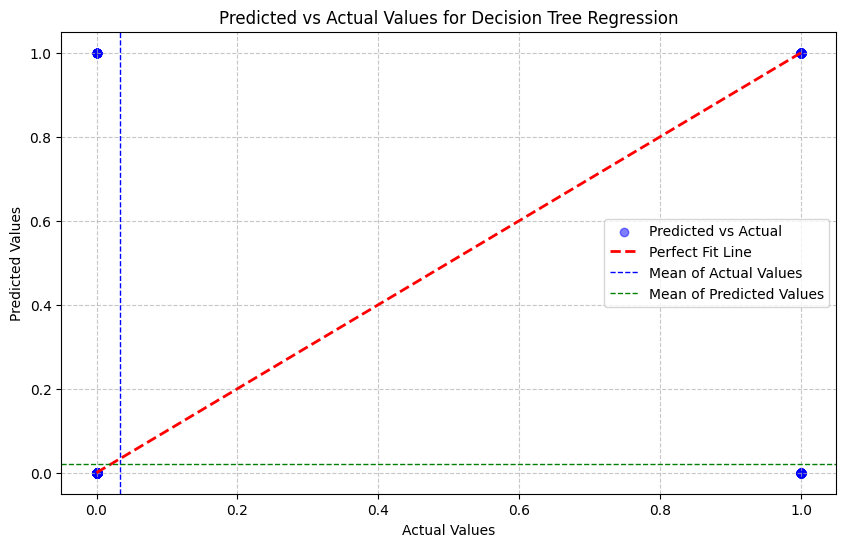

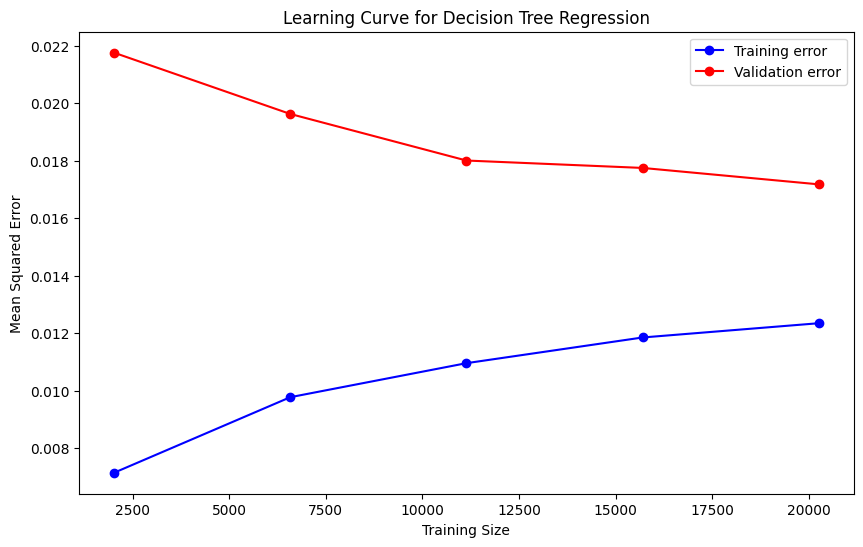

Decision Tree Regression Evaluation:
Accuracy: 0.98
Precision: 0.86
Recall: 0.54
F1 Score: 0.66


In [87]:
evaluate_model('Decision Tree Regression', y_test, y_pred_tree, model=decision_tree_model)

Random Forest Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6121
           1       0.84      0.55      0.66       207

    accuracy                           0.98      6328
   macro avg       0.91      0.77      0.83      6328
weighted avg       0.98      0.98      0.98      6328



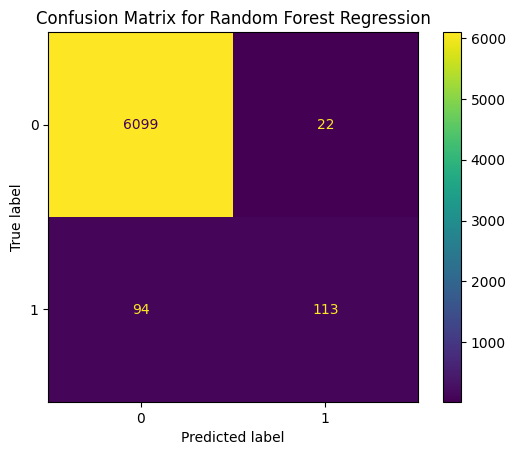

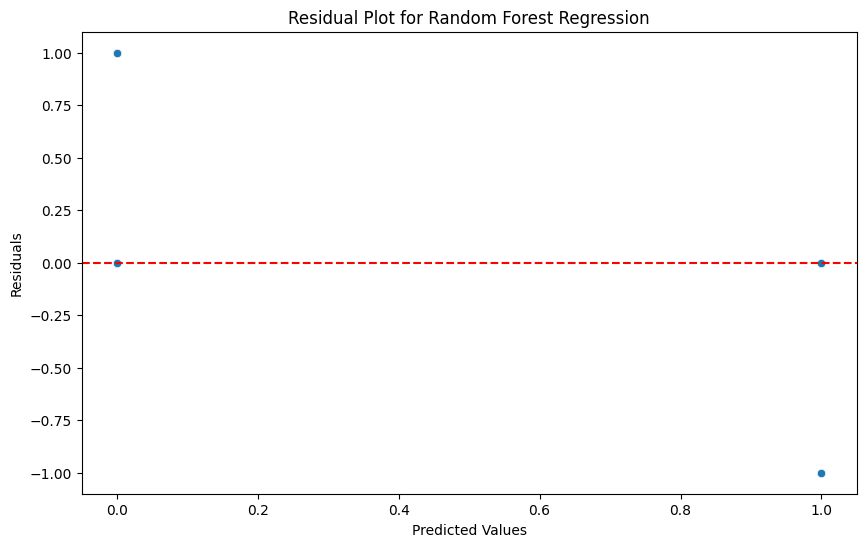

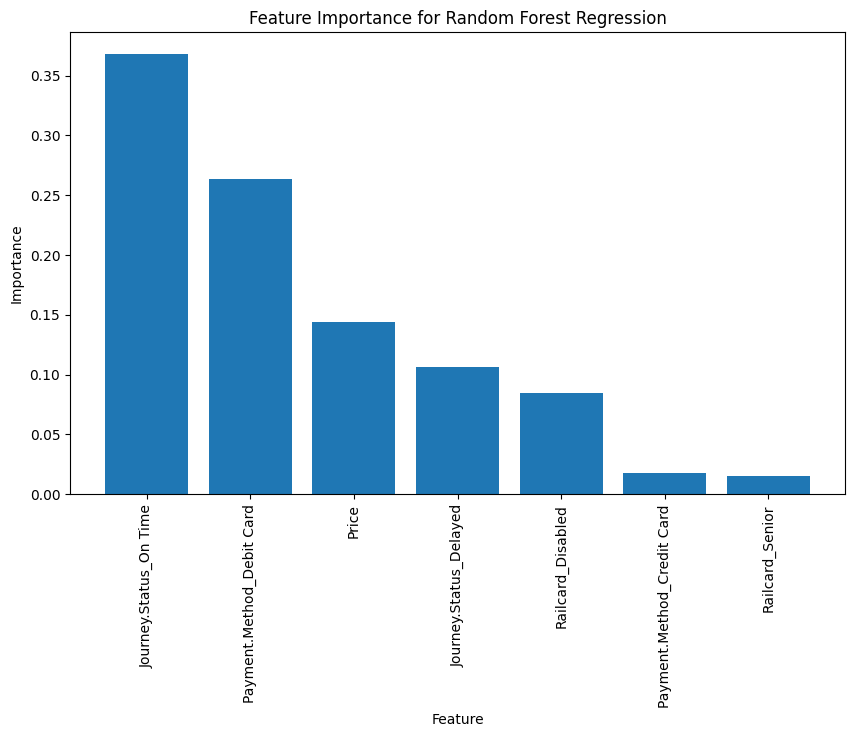

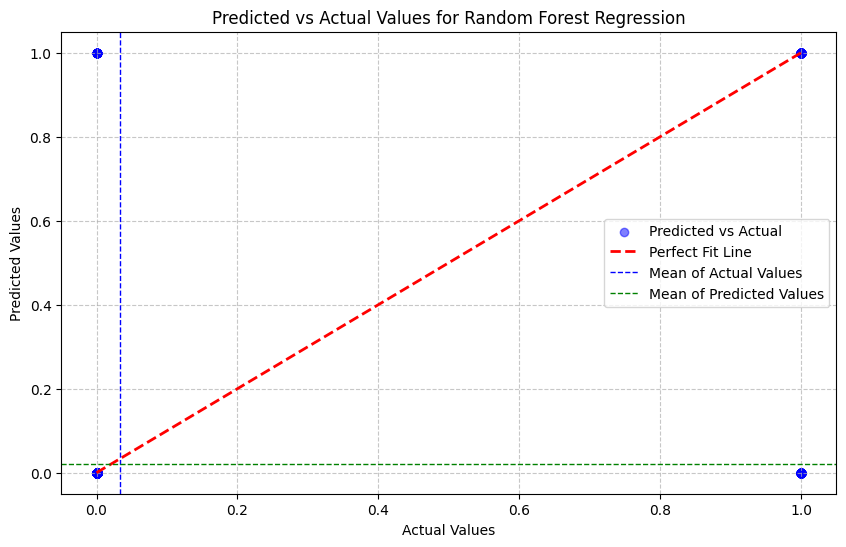

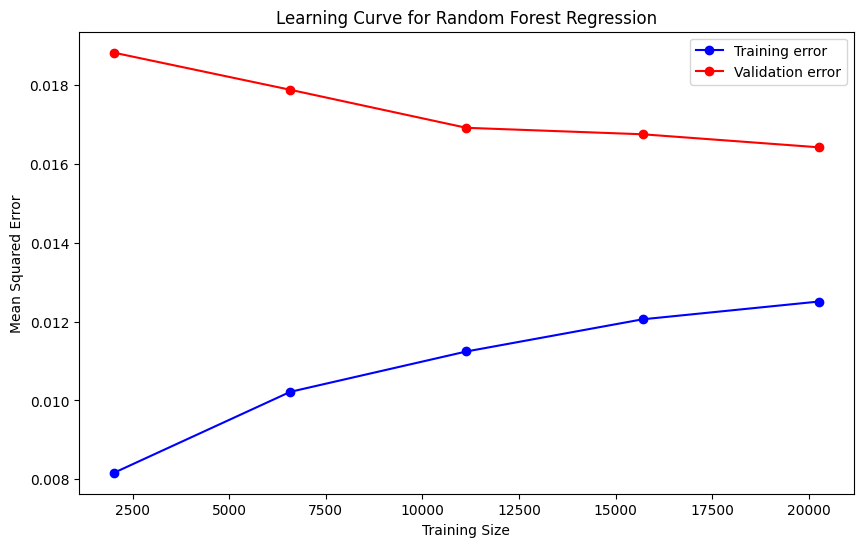

Random Forest Regression Evaluation:
Accuracy: 0.98
Precision: 0.84
Recall: 0.55
F1 Score: 0.66


In [88]:
evaluate_model('Random Forest Regression', y_test, y_pred_rf, model=random_forest_model)

Gradient Boosting Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6121
           1       0.92      0.47      0.62       207

    accuracy                           0.98      6328
   macro avg       0.95      0.74      0.81      6328
weighted avg       0.98      0.98      0.98      6328



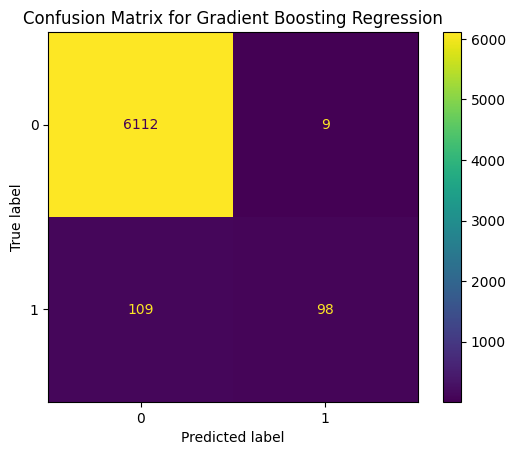

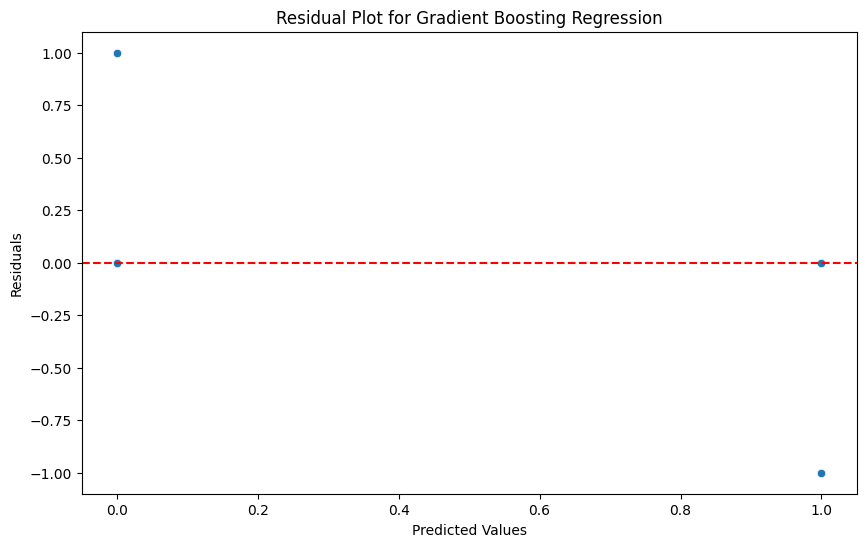

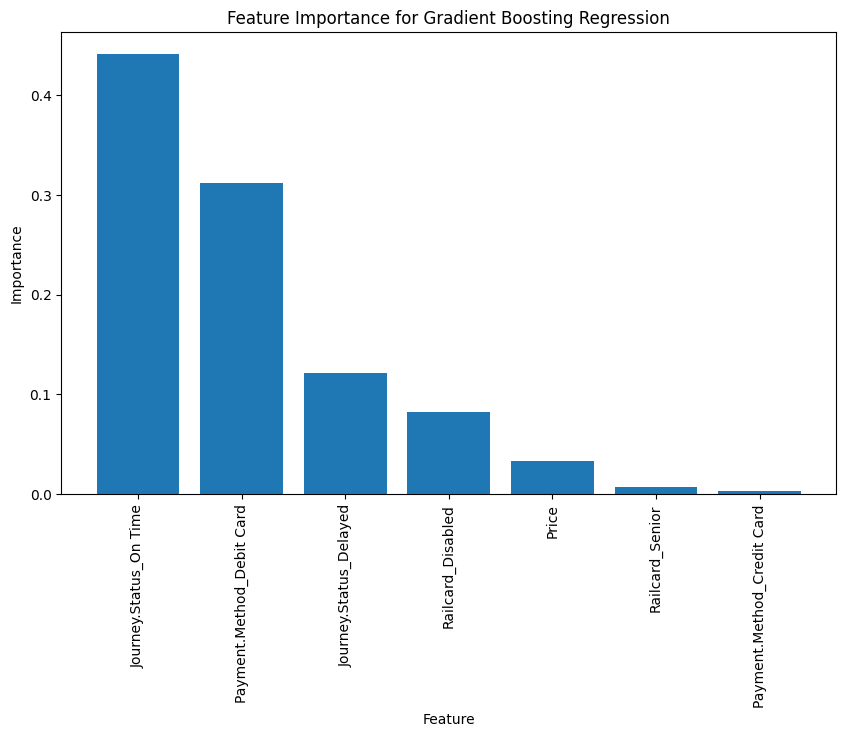

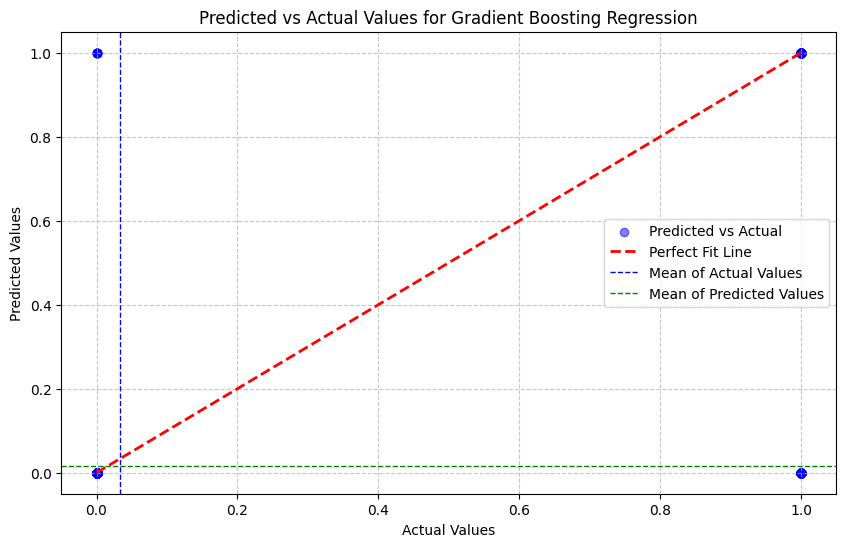

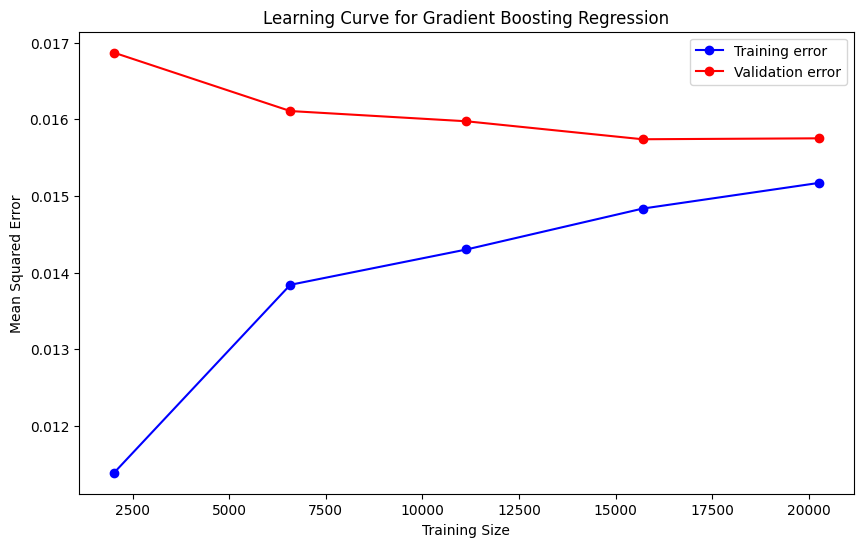

Gradient Boosting Regression Evaluation:
Accuracy: 0.98
Precision: 0.92
Recall: 0.47
F1 Score: 0.62


In [89]:
evaluate_model('Gradient Boosting Regression', y_test, y_pred_gb, model=gb_model)

#### Choose Random Forest Regression

In [90]:
to_predict_data

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay
0,Debit Card,NaN,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45,2024-01-04 19:05,2024-01-04 19:05,On Time,NaN
1,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15,2024-01-05 09:35,2024-01-05 09:35,On Time,NaN
2,Debit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30,2024-01-09 17:45,2024-01-09 18:07,Delayed,Staffing
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45,2024-01-31 06:15,2024-01-31 06:49,Delayed,Signal Failure
4,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00,2024-02-10 16:30,NaN,Cancelled,Technical Issue
5,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-25 15:45,2024-02-25 16:15,NaN,Cancelled,Staffing
6,Debit Card,NaN,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,2024-03-20 15:30,2024-03-20 17:20,2024-03-20 17:36,Delayed,Staffing
7,Credit Card,NaN,Standard,Advance,22,Birmingham New Street,London St Pancras,2024-04-16 04:30,2024-04-16 05:50,NaN,Cancelled,Signal Failure


In [91]:
to_predict_data = to_predict_data[['Payment.Method', 'Railcard', 'Price', 'Journey.Status']]

In [92]:
X_numeric

,Price,Railcard_Disabled,Railcard_Senior,Payment.Method_Credit Card,Payment.Method_Debit Card,Journey.Status_Delayed,Journey.Status_On Time
0,43,False,False,False,False,False,True
1,23,False,False,True,False,True,False
2,3,False,False,True,False,False,True
3,13,False,False,True,False,False,True
4,76,False,False,False,False,False,True
...,...,...,...,...,...,...,...
31634,4,False,False,True,False,False,True
31635,10,False,False,False,False,False,True
31636,4,False,False,True,False,False,True
31637,10,False,False,True,False,False,True


In [93]:
to_predict_data_numeric = pd.get_dummies(to_predict_data, drop_first=True)

In [94]:
to_predict_data_numeric = to_predict_data_numeric.reindex(columns=all_columns, fill_value=0)

In [95]:
to_predict_data_numeric

,Price,Railcard_Disabled,Railcard_Senior,Payment.Method_Credit Card,Payment.Method_Debit Card,Journey.Status_Delayed,Journey.Status_On Time
0,54,0,0,False,True,False,True
1,7,0,0,True,False,False,True
2,113,0,0,False,True,True,False
3,3,0,0,False,False,True,False
4,4,0,0,True,False,False,False
5,3,0,0,False,False,False,False
6,126,0,0,False,True,True,False
7,22,0,0,True,False,False,False


In [96]:
# Make predictions using Random Forest
refund_probabilities_rf = random_forest_model.predict(to_predict_data_numeric)

In [97]:
refund_probabilities_rf = (refund_probabilities_rf - refund_probabilities_rf.min()) / (refund_probabilities_rf.max() - refund_probabilities_rf.min())
to_predict_data['Refund_Probability_RF'] = refund_probabilities_rf

C:\Users\murui\AppData\Local\Temp\ipykernel_112596\3258749913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_data['Refund_Probability_RF'] = refund_probabilities_rf


In [98]:
to_predict_data['Refund_Prediction'] = np.where(refund_probabilities_rf >= 0.5, 1, 0)
to_predict_data['Refund_Probability_RF'] = refund_probabilities_rf

C:\Users\murui\AppData\Local\Temp\ipykernel_112596\3730004708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_data['Refund_Prediction'] = np.where(refund_probabilities_rf >= 0.5, 1, 0)
C:\Users\murui\AppData\Local\Temp\ipykernel_112596\3730004708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_data['Refund_Probability_RF'] = refund_probabilities_rf


In [99]:
to_predict_data

,Payment.Method,Railcard,Price,Journey.Status,Refund_Probability_RF,Refund_Prediction
0,Debit Card,NaN,54,On Time,0.000000,0
1,Credit Card,NaN,7,On Time,0.000000,0
2,Debit Card,NaN,113,Delayed,1.000000,1
3,Contactless,Adult,3,Delayed,0.000000,0
4,Credit Card,NaN,4,Cancelled,0.378896,0
5,Contactless,NaN,3,Cancelled,0.270071,0
6,Debit Card,NaN,126,Delayed,1.000000,1
7,Credit Card,NaN,22,Cancelled,0.008737,0


In [100]:
to_predict_data_rg = to_predict_data.copy()

In [101]:
refund_probabilities_logistic = logistic_model.predict_proba(to_predict_data_numeric)[:, 1]
to_predict_data_rg['Refund_Probability_Logistic'] = refund_probabilities_logistic

# Interpretation: Calculate the probability for each passenger to request a refund
to_predict_data_rg['Refund_Prediction'] = np.where(refund_probabilities_logistic >= 0.5, 1, 0)

In [102]:
to_predict_data_rg

,Payment.Method,Railcard,Price,Journey.Status,Refund_Probability_RF,Refund_Prediction,Refund_Probability_Logistic
0,Debit Card,NaN,54,On Time,0.000000,0,0.006414
1,Credit Card,NaN,7,On Time,0.000000,0,0.000169
2,Debit Card,NaN,113,Delayed,1.000000,1,0.738351
3,Contactless,Adult,3,Delayed,0.000000,0,0.095266
4,Credit Card,NaN,4,Cancelled,0.378896,0,0.298045
5,Contactless,NaN,3,Cancelled,0.270071,0,0.347095
6,Debit Card,NaN,126,Delayed,1.000000,1,0.733158
7,Credit Card,NaN,22,Cancelled,0.008737,0,0.290365
